# **Homework - Spring 2024**

In [1]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

## **STUDENT ID Setup**
Enter your 10-digit ID below:

In [ ]:
STUDENT_ID = 000       # YOUR STUDENT-ID GOES HERE AS AN INTEGER#

# **1. Linear Regression [29pts]**

## **1.1. Linear Regression Implementation [19 pts]**

In this section you will implement linear regression with both L1 and L2 regularization. Your class LinearRegression must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `fit(X, y)`
* `has_converged(theta_old, theta_new)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LinearRegression class. **DO NOT** change the API.

### **1.1.1. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

$
\mathcal{L}({\theta}) = \frac{1}{N}\sum_{i =1}^N (h_{{\theta}}({x}_i) - y_i)^2
$

where

> $h_{{\theta}}({x}_i) = \theta^Tx_i$

Based on the regularization penalty, you may need to add below regularization penalty loss to MSE Loss computed previously.

L1 Regularization Loss:
>$
\mathcal{L_1}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularization Loss:
>$
\mathcal{L_2}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  {\theta}_j^2 
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. <font color=Red>Note that we do not include the intercept in the regularization terms.</font>

---

### **1.1.2. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.3. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 1.1.4 for convergence condition.
 
---

### **1.1.4. Training with Gradient Descent [3 pts]**

The `fit` method should train the model via gradient descent, relying on the `compute_cost` and `compute_gradient` functions. The trained weights/coefficients must be stored as `theta_`. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when 
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$, 
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance). 

* To ensure that the function terminates, we should set a maximum limit for the number of epochs irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.5. Training with Stochastic Gradient Descent (SGD) [3 pts]**

The `fit_sgd` method should train the model via stochastic gradient descent (SGD), relying on the `compute_cost` and `compute_gradient` functions.

The trained weights/coefficients must be stored as `theta_`. The weights and the corresponding cost after every SGD iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* Unlike regular (or batch) gradient descent, SGD takes a gradient step on a single training example on each iteration. In other words, rather than compute the gradient for all training examples, summing them, and taking a single gradient step, it iterates through training examples, computes the gradient for that training example, and immediately takes a single gradient step before proceeding to the next training example. One pass over the entire training dataset is called an epoch; at the end of an epoch, the next epoch restarts from the first example in the training dataset.

* As with gradient descent, SGD stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when 
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$, 
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance). Since each step is much shorter, SGD typically only checks for convergence at the end of each epoch.

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`. <font color=Red>The `max_iter` here refers to the max of epoch.</font>

* `alpha` is the learning rate of the SGD algorithm.

---

### **1.1.6. Predict [2 pts]**

The `predict` function should predict the output for the data points in a given input data matrix.

In [3]:
class LinearRegression:

    """
    Linear Regression

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularization constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration
    """
    
    def __init__(self, alpha = 0.01, tol=1e-4, max_iter = 100, theta_init = None, penalty = None, lambd = 0):
        
        # store meta-data
        self.alpha = alpha
        self.theta_init = theta_init
        self.max_iter = max_iter
        self.tol = tol
        self.penalty = penalty
        self.lambd = lambd

        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None
    
    def compute_cost(self, theta: np.ndarray, X: np.ndarray, y: np.ndarray):
    
        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """ 
        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        y_hat = X.dot(theta)
        loss = np.power(y_hat - y, 2).mean()
        if self.penalty == 'l1':
            l1 = self.lambd * np.abs(theta[1:]).sum()
            loss += l1
        
        elif self.penalty == 'l2':
            l2 = self.lambd * np.power(theta[1:], 2).sum()
            loss += l2
        
        return loss
        # TODO ENDS

    def compute_gradient(self, theta, X, y):
    
        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """
        
        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        predictions = X.dot(theta)
        error = predictions - y
          
        # 计算不含正则项的损失函数的梯度  
        gradient = X.T.dot(error) / X.shape[0] * 2
          
        if self.penalty == 'l1':
            # 添加 l1 正则项的梯度
            gradient += self.lambd * np.insert(np.sign(theta[1:]), 0, 0)

        elif self.penalty == 'l2':
            # 添加 l2 正则项的梯度  
            gradient += self.lambd * np.insert(theta[1:], 0, 0) * 2
            
        return gradient
        # TODO ENDS

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function

        # 计算新旧权重之间的差异  
        difference = theta_new - theta_old  
          
        # 计算差异的L2范数（欧几里得距离）  
        difference_norm = np.linalg.norm(difference)  
          
        # 检查是否收敛  
        converged = difference_norm < self.tol
          
        return converged
    
        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))
        
        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])
        
        # TODO START: Complete the function
        for iteration in range(self.max_iter):  
            # 计算梯度  
            gradient = self.compute_gradient(theta_old, X, y)  
  
            # 更新权重  
            theta_new = theta_old - self.alpha * gradient
  
            # 记录新的权重和代价  
            self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))  
            cost = self.compute_cost(theta_new, X, y)  
            self.hist_cost_ = np.vstack((self.hist_cost_, cost))  
  
 
            if self.has_converged(theta_old, theta_new):
                # 更新权重  
                theta_old = theta_new 
                break
            # 更新权重  
            theta_old = theta_new 
  
        # 存储最终的权重  
        self.theta_ = theta_old
        # TODO END

    def fit_sgd(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.
        Make sure to save theta_ for each gradient descent conducted

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))
        
        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])
        
        # TODO START: Complete the function
        indices = np.arange(N)
        for iteration in range(self.max_iter): 
            theta_new = None
            for i in indices:  
                # 使用第i个样本来计算梯度  
                xi = X[i:i+1]  
                yi = y[i:i+1] 
                # 计算梯度 
                gradient = self.compute_gradient(theta_old, xi, yi) 
    
                # 更新权重  
                theta_new = theta_old - self.alpha * gradient
    
                # 记录新的权重和代价  

                self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))  
                cost = self.compute_cost(theta_new, X, y)
                self.hist_cost_ = np.vstack((self.hist_cost_, cost))  

                # 更新权重  
                theta_old = theta_new 
    
            if self.has_converged(self.hist_cost_[-2], theta_new):
                # 更新权重  
                theta_old = theta_new 
                break
  
        # 存储最终的权重  
        self.theta_ = theta_old
        # TODO END

    def predict(self, X):

        """
        Predict the target variable values for the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted target variables values for the data points in X
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))
        
        # TODO START: Complete the function
        y_hat = X.dot(self.theta_)
        return y_hat  
        # TODO END

In [4]:
def test_lin_reg_compute_cost(StudentLinearRegression):
    
    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.881828654157736
    
    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.94300429515773

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.919253244675344
    assert np.abs(student_ans - required_ans) <= 1e-2

test_lin_reg_compute_cost(LinearRegression)

In [5]:
def test_lin_reg_compute_gradient(StudentLinearRegression):
    
    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.53908485]
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.63908485]

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.66143613]
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_compute_gradient(LinearRegression)

In [6]:
def test_lin_reg_has_converged(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_reg.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True
    
    assert student_ans == required_ans

test_lin_reg_has_converged(LinearRegression)

In [7]:
def test_lin_reg_fit(StudentLinearRegression):
    
    student_lr_reg = StudentLinearRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.012     ,  0.00566085, -0.00773638],
       [ 0.02351422,  0.01085581, -0.01491529],
       [ 0.03457102,  0.01561393, -0.0215702 ],
       [ 0.04519706,  0.01996249, -0.02773259],
       [ 0.05541739,  0.02392713, -0.03343205]])
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_fit(LinearRegression)

In [8]:
def test_lin_reg_fit_sgd(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_reg.fit_sgd(test_case_X, test_case_y)
    student_ans = student_lr_reg.hist_theta_
    required_ans = np.array([[ 0. ,         0. ,         0.        ],
        [ 0.02 ,       0.03248691, -0.01223513],
        [ 0.03968062,  0.02209216, -0.03335181],
        [ 0.03696942,  0.01974587, -0.02711189],
        [ 0.03512822,  0.01653332, -0.02571035],
        [ 0.05419193,  0.02261539, -0.03046428],
        [ 0.07200065,  0.05154291, -0.04135888],
        [ 0.09021758,  0.04192125, -0.06090506],
        [ 0.08488414,  0.03730565, -0.04862995],
        [ 0.08114428,  0.0307803 , -0.04578314],
        [ 0.09909665,  0.03650781, -0.05025993],
        [ 0.11531376,  0.06284999, -0.06018085],
        [ 0.13237995,  0.05383611, -0.07849234],
        [ 0.12518748,  0.04761169, -0.0619386 ],
        [ 0.1200793 ,  0.03869888, -0.05805022],
        [ 0.13714127,  0.04414231, -0.06230497],
        [ 0.15220209,  0.06860628, -0.07151852],
        [ 0.16834802,  0.06007846, -0.0888426 ],
        [ 0.15985172,  0.05272569, -0.06928804],
        [ 0.15375991,  0.04209663, -0.06465091],
        [ 0.17009366,  0.04730773, -0.06872406],
        [ 0.18431405,  0.07040657, -0.07742348],
        [ 0.19971005,  0.06227484, -0.0939429 ],
        [ 0.19031372,  0.05414318, -0.07231689],
        [ 0.18351709,  0.04228434, -0.06714324],
        [ 0.19924207,  0.04730123, -0.07106459]])
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_fit_sgd(LinearRegression)

In [9]:
def test_lin_reg_predict(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.predict(test_case_X)
    print('student_ans', student_ans)
    required_ans = np.array([0.04739416, 0.02735934, 0.02140787, 0.04634383, 0.04320043,
       0.02836861, 0.03726417, 0.03808224, 0.03214353, 0.05166998,
       0.05102933, 0.05639199, 0.0416892 , 0.03175554, 0.04895695,
       0.03465034, 0.02912364, 0.03954521, 0.0396391 , 0.06440433,
       0.03189335, 0.06016748, 0.03661307, 0.07146111, 0.05261461,
       0.04180017, 0.03223834, 0.0500466 , 0.06128615, 0.05703506,
       0.05467262, 0.04388664, 0.04648138, 0.07052753, 0.04140456,
       0.02830984, 0.05608863, 0.0212115 , 0.05238969, 0.05514024,
       0.04020117, 0.05048966, 0.04696158, 0.04438422, 0.05897309,
       0.05443805, 0.03375689, 0.04794345, 0.04242038, 0.04869202])
    
    assert np.mean(np.abs(student_ans - required_ans)) <= 1e-2

test_lin_reg_predict(LinearRegression)

student_ans [0.04739416 0.02735934 0.02140787 0.04634383 0.04320043 0.02836861
 0.03726417 0.03808224 0.03214353 0.05166998 0.05102933 0.05639199
 0.0416892  0.03175554 0.04895695 0.03465034 0.02912364 0.03954521
 0.0396391  0.06440433 0.03189335 0.06016748 0.03661307 0.07146111
 0.05261461 0.04180017 0.03223834 0.0500466  0.06128615 0.05703506
 0.05467262 0.04388664 0.04648138 0.07052753 0.04140456 0.02830984
 0.05608863 0.0212115  0.05238969 0.05514024 0.04020117 0.05048966
 0.04696158 0.04438422 0.05897309 0.05443805 0.03375689 0.04794345
 0.04242038 0.04869202]


In [10]:
def test_lin_reg_predict_sgd(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_reg.fit_sgd(test_case_X, test_case_y)
    student_ans = student_lr_reg.predict(test_case_X)
    print('student_ans', student_ans)
    required_ans = np.array([0.4113478,  0.28834918, 0.1227324,  0.39008601, 0.43987045, 0.17506316,
                            0.40365951, 0.32180596, 0.32776898, 0.56721846, 0.63147595, 0.57385561,
                            0.38334306, 0.31959516, 0.5517445,  0.39322627, 0.3213112,  0.45537132,
                            0.48490982, 0.62956115, 0.32575875, 0.72747134, 0.37152396, 0.81428507,
                            0.57451273, 0.42292006, 0.3905908,  0.56212164, 0.64126265, 0.62130162,
                            0.65671342, 0.43645374, 0.47163355, 0.74245718, 0.29808437, 0.35882346,
                            0.61700668, 0.15509352, 0.59866825, 0.60026664, 0.43537041, 0.5427557,
                            0.49628385, 0.51805151, 0.65681787, 0.52965323, 0.36155917, 0.49471154,
                            0.47184886, 0.57066729])
    
    assert np.mean(np.abs(student_ans - required_ans)) <= 1e-2

test_lin_reg_predict_sgd(LinearRegression)

student_ans [0.4113478  0.28834918 0.1227324  0.39008601 0.43987045 0.17506316
 0.40365951 0.32180596 0.32776898 0.56721846 0.63147595 0.57385561
 0.38334306 0.31959516 0.5517445  0.39322627 0.3213112  0.45537132
 0.48490982 0.62956115 0.32575875 0.72747134 0.37152396 0.81428507
 0.57451273 0.42292006 0.3905908  0.56212164 0.64126265 0.62130162
 0.65671342 0.43645374 0.47163355 0.74245718 0.29808437 0.35882346
 0.61700668 0.15509352 0.59866825 0.60026664 0.43537041 0.5427557
 0.49628385 0.51805151 0.65681787 0.52965323 0.36155917 0.49471154
 0.47184886 0.57066729]


## **1.2. Synthetic dataset [Ungraded]**

In this section we will first create some synthetic data on which we will run your linear regression implementation. We are creating 100 datapoints around the function y = mx + b, introducing Gaussian noise.

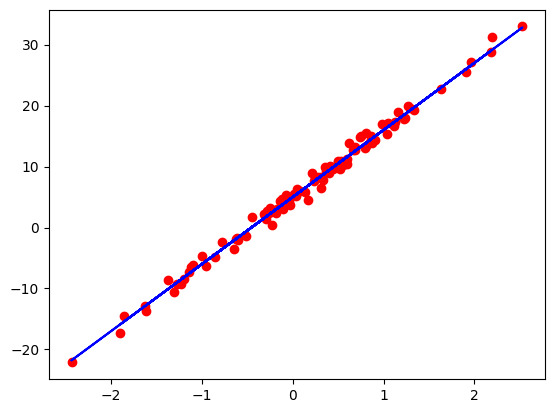

In [11]:
num_samples = 100

np.random.seed(1)
noise = np.random.randn(num_samples, 1)
X = np.random.randn(num_samples, 1)

y_ideal = 11*X + 5
y_real = (11*X + 5) + noise

plt.plot(X, y_real, 'ro')
plt.plot(X, y_ideal, 'b')

We see that this data is clearly regressable with a line, which, ideally, would be 11x + 5

Train a linear regression model using gradient descent, you should see that training loss goes down with the number of iterations and obtain a theta that converges to a value very close to [b, m], which in this case, for 11x + 5, would be theta = [5, 11]

Also, notice the effect of the type of regularization on the theta obtained (after convergence) as well as the testing MSE loss. Do they make sense, given what was discussed in class? 


 Theta: [ 5.00120552 10.99863221] 
 Norm of Theta: 12.082299740311315 
 Testing MSELoss: 2.1379957881542626e-06


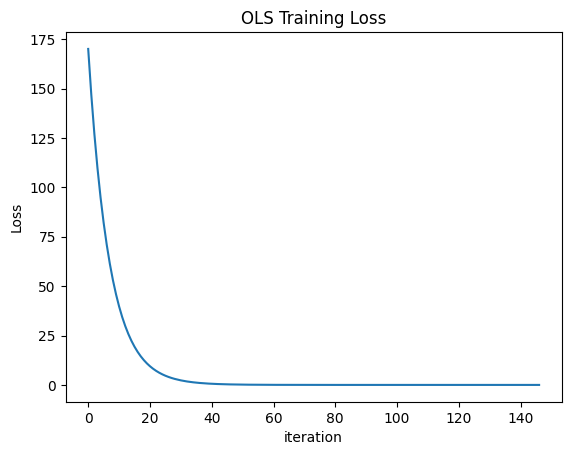


 Theta: [ 5.00293128 10.98873294] 
 Norm of Theta: 12.074004012300998 
 Testing MSELoss: 7.113216624524173e-05


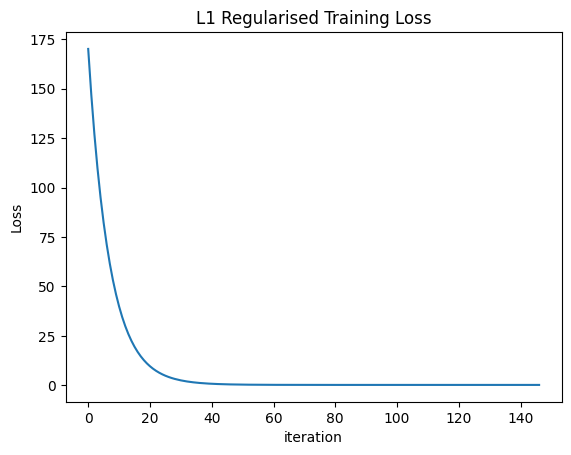


 Theta: [ 5.03848665 10.78503368] 
 Norm of Theta: 11.903919490265675 
 Testing MSELoss: 0.0250109948776407


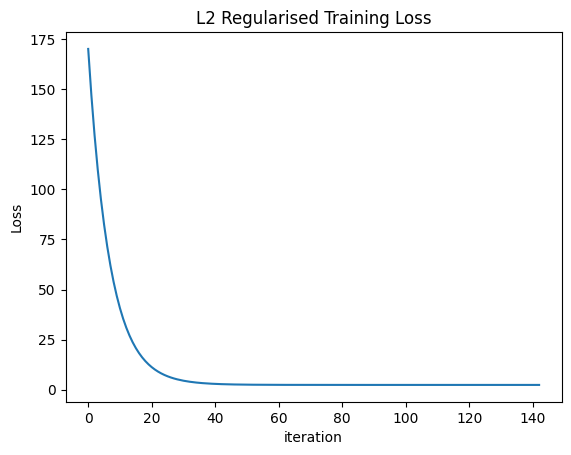

In [12]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def test_synthetic_data_sgd(X, y, n_iter = 2000, penalty=None, lambd=0):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)
  # Given that we want to get theta as the weights of the linear equation, we won't 
  # standardize in this section

  alpha = 0.03  # Learning Rate

  # # Train the model
  lr_model = LinearRegression(alpha = alpha, tol=1e-4, max_iter = n_iter, penalty=penalty, lambd=lambd)
  lr_model.fit(X_train,y_train[:, 0])
  y_predict = lr_model.predict(X_test)
  loss = sklearn.metrics.mean_squared_error(y_predict, y_test)
  print()
  print(" Theta: {} \n Norm of Theta: {} \n Testing MSELoss: {}".format(lr_model.theta_, np.linalg.norm(lr_model.theta_, ord=2), loss))

  loss_history = lr_model.hist_cost_
  plt.plot(range(len(loss_history)), loss_history)
  plt.title("OLS Training Loss")
  plt.xlabel("iteration")
  plt.ylabel("Loss")
  if penalty == "l1":
    plt.title("L1 Regularised Training Loss")
  elif penalty == "l2":
    plt.title("L2 Regularised Training Loss")
  plt.show()

test_synthetic_data_sgd(X, y_ideal, 500)
test_synthetic_data_sgd(X, y_ideal, 500, "l1", 0.02)
test_synthetic_data_sgd(X, y_ideal, 500, "l2", 0.02)

## **1.3. Effect of polynomial degree on training and validation error [5 pts]**

Now, we consider a dataset that was generated using some higher degree polynomial function of the input variable. We do not know the degree of the underlying polynomial. Let us assume it to be an unknown value "p" and try to estimate it.

Polynomial regression hypothesis for one input variable  or feature (x) can be written as:
> $y = w_0 + w_1x + w_2x^2 + ... + w_px^p $

If you observe carefully, this can still be solved as a linear regression, where, instead of just 2 weights, we have p+1 weights, and the new features are higher order terms of the original feature. Using this idea, in this section, we will investigate how changing the assumed polynomial degree "p" in our model affects the training and validation error.

In [13]:
poly_reg_df = pd.read_csv('poly_reg.csv')  

In [14]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinearRegressionSklearn

from sklearn.metrics import mean_squared_error

def polynomial_regression(poly_reg_df, degrees):
    """
    Runs polynomial regression on the dataset 'poly_reg_df' for all the powers in 'degrees'
    """

    loss_train_list = []
    loss_test_list = []

    X_base = poly_reg_df.iloc[:, :-1].values
    y = poly_reg_df.iloc[:, -1].values

    for d in degrees:

        # TODO START: Complete the function:
        # 1. Transform the base feature X_base into its polynomial features of degree 'd' using PolynomialFeatures
        # Set include_bias to be False
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X_base)
        
        # 2. Preprocessing and splitting into train/test (70-30 ratio and random_state as 42)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
        
        # 3. Scale X_train and X_test appropriately 
        scaler = StandardScaler()
        # 必须先进行fit_transform，后进行transform，此时transform会将之前得到的均值的标准差直接应用
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # 4. Use scikit-learn's LinearRegression (imported as LinearRegressionSklearn for you) to 
        # fit a linear model between the scaled version of X_train and y_train
        regressor = LinearRegressionSklearn()
        regressor.fit(X_train_scaled, y_train)
        
        # 5. Obtain predictions of the model on train and test data
        y_train_pred = regressor.predict(X_train_scaled)
        y_test_pred = regressor.predict(X_test_scaled)

        # 6. Compute the mean squared error and store it in loss_train and loss_test
        loss_train = mean_squared_error(y_train, y_train_pred)
        loss_test = mean_squared_error(y_test, y_test_pred)

        # 7. Append loss_train to loss_train_list and loss_test to loss_test_list
        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
        
    return loss_train_list, loss_test_list
    # TODO END

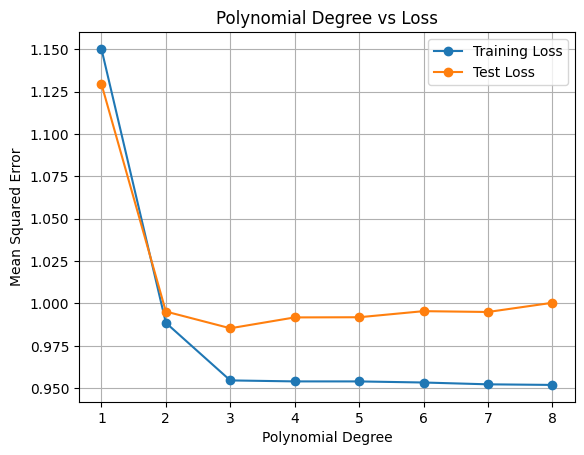

In [15]:
degrees = np.arange(1, 9)

loss_train_list, loss_test_list = polynomial_regression(poly_reg_df, degrees)

# TODO START:
# Plot the polynomial degrees (x-axis) against loss_train_list (y-axis) and loss_test_list (y-axis) in a single plot, with different colors.
# Make sure to include x and y axis labels, legend as well as the title
# 绘制训练损失和测试损失  
plt.plot(degrees, loss_train_list, marker='o', label='Training Loss')  
plt.plot(degrees, loss_test_list, marker='o', label='Test Loss')  
  
# 设置图例、标题和轴标签  
plt.legend()  
plt.title('Polynomial Degree vs Loss')  
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')  
  
# 显示网格  
plt.grid(True)  
  
# 显示图表  
plt.show()

# TODO END

**Attach the plot to your written homework solutions. Describe the trends in the plot obtained. Briefly explain the reasoning behind why this would happen.**

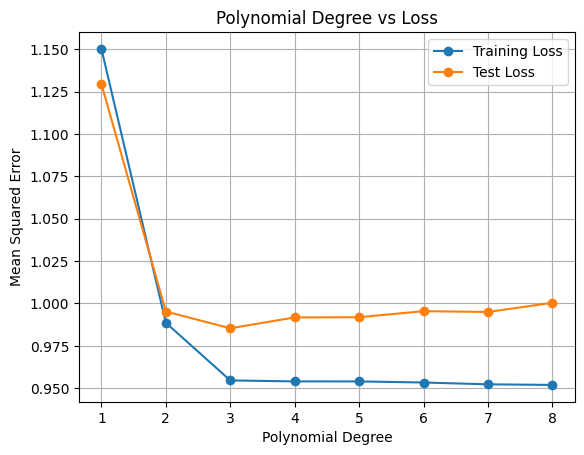

随着多项式次数的增加，训练误差和测试误差均呈现出逐渐减小的趋势。这表明随着多项式模型复杂度的提高，它能够更好地拟合数据，导致训练误差和测试误差的降低。这种趋势表明，在一定程度上，增加模型的复杂度可以帮助提高模型的性能。然而，也需要注意到，过于复杂的模型可能导致过拟合，因此在选择多项式次数时需要权衡模型的复杂度和泛化能力。

## **1.4. Effect of learning rate on gradient descent [5 pts]**

In [16]:
train_df = pd.read_csv("admit.csv")

The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.03, 0.1, 1.0}, fit a <font color=Red>linear regression model</font> to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

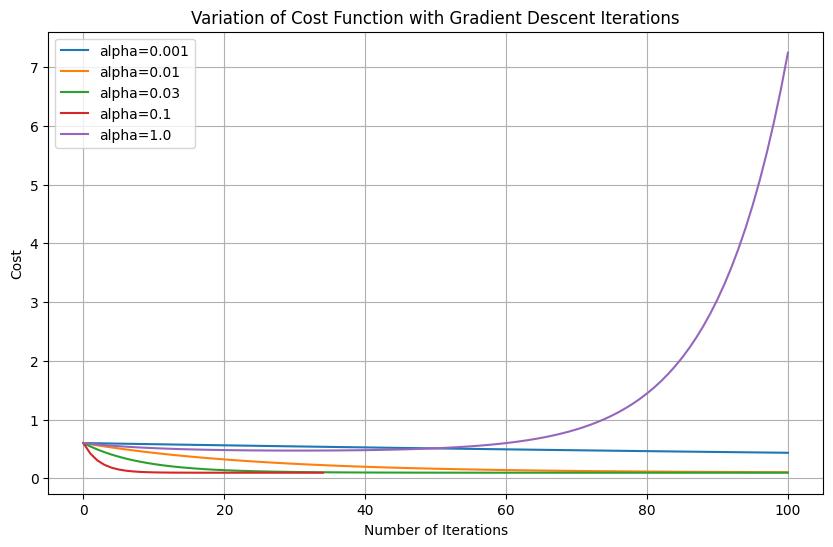

In [17]:
# TODO: The previously the plot showed a divergent behavior for alpha=0.25, but with linear regression, we do not find any learning rate that exhibits such behavior

# STUDENT CODE STARTS:

# 抽取特征和目标值
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values  
  
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the learning rates  
learning_rates = [0.001, 0.01, 0.03, 0.1, 1.0]  
  
# Initialize a list to store the cost history for each learning rate  
cost_history = []


for lr in learning_rates:
    lr_model = LinearRegression(alpha=lr, tol=1e-4, max_iter=100, penalty='l2', lambd=0.001)
    lr_model.fit(X_scaled, y)
    cost_history.append(lr_model.hist_cost_)
  
# Plot the cost function variation with respect to the number of iterations  
plt.figure(figsize=(10, 6))
for i in range(len(learning_rates)):
    plt.plot(range(len(cost_history[i])), cost_history[i], label=f'alpha={learning_rates[i]}')  
  
plt.title('Variation of Cost Function with Gradient Descent Iterations')  
plt.xlabel('Number of Iterations')  
plt.ylabel('Cost')  
plt.legend()  
plt.grid(True)  
plt.show()  

# STUDENT CODE ENDS

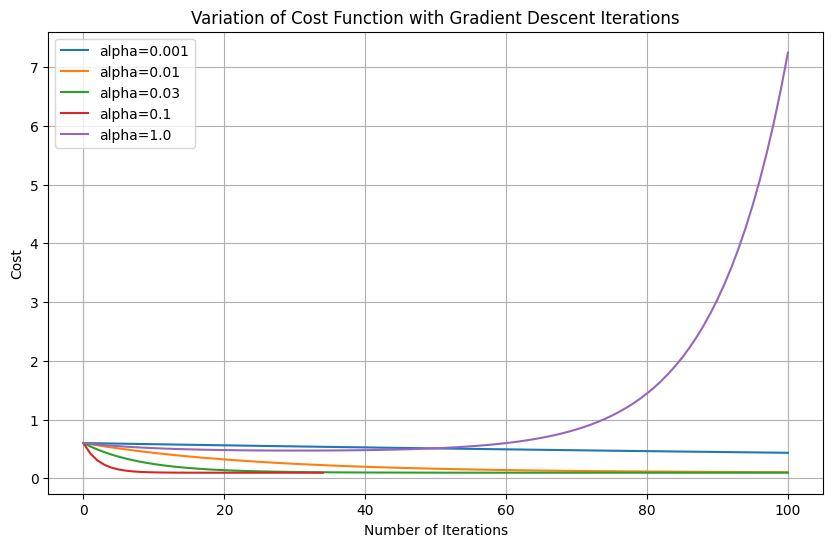

随着学习率的增加，cost函数在初期的下降速度也随之增加。然而，当学习率过高时（例如alpha=1.0），成本函数在迭代过程中出现了较为明显的波动，甚至可能无法收敛到最低点。这表明过高的学习率可能导致算法在寻找最优解的过程中发生震荡，从而无法稳定地减小成本函数。

相对而言，较低的学习率（如alpha=0.001和alpha=0.01）在迭代初期下降速度较慢，但随着迭代次数的增加，成本函数逐渐趋于稳定并达到一个较低的值。这表明较低的学习率虽然收敛速度较慢，但能够较为稳定地找到成本函数的最小值。

在中等学习率（如alpha=0.03和alpha=0.1）的情况下，成本函数在初期下降较快，同时也能够在一定程度上保持稳定性，避免了过高学习率带来的震荡问题。

从图中可以看出，学习率最好的是**0.1**。


# **2. Logistic Regression [23pts]** 

## **2.1. Logistic Regression Implementation [18 pts]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **2.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **2.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2 
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **2.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **2.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 2.1.5 for convergence condition.
 
---

### **2.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when 
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$, 
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance). 

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **2.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **2.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [18]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration
    
    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd
        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x):

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function
        # 使用numpy的exp函数来计算e的-x次方，并计算sigmoid值  
        return 1 / (1 + np.exp(-x))

        # TODO END

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """
        
        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.
        h = self.sigmoid(np.nansum(np.multiply(X, theta), axis=1))
        loss = ( - y * np.log(h) - (1 - y) * np.log(1 - h)).sum()
        if self.penalty == 'l1':
            l1 = self.lambd * np.abs(theta[1:]).sum()
            loss += l1
        
        elif self.penalty == 'l2':
            l2 = self.lambd * np.power(theta[1:], 2).sum()
            loss += l2
        
        return loss

        # TODO END
        
    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        predictions = self.sigmoid(np.nansum(np.multiply(X, theta), axis=1))
        # 计算不含正则项的损失函数的梯度  
        gradient = - np.nansum(X.T * (y-predictions), axis=1)
        if self.penalty == 'l1':
            # 添加 l1 正则项的梯度
            gradient += self.lambd * np.insert(np.sign(theta[1:]), 0, 0)

        elif self.penalty == 'l2':
            # 添加 l2 正则项的梯度  
            gradient += self.lambd * np.insert(theta[1:], 0, 0) * 2
            
        return gradient
        # TODO END

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent
        
        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        # 计算新旧权重之间的差异  
        difference = theta_new - theta_old  
          
        # 计算差异的L2范数（欧几里得距离）  
        difference_norm = np.linalg.norm(difference)  
          
        # 检查是否收敛  
        converged = difference_norm < self.tol
          
        return converged
        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))
        
        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])
        
        # TODO START: Complete the function
        for iteration in range(self.max_iter):  
            # 计算梯度  
            gradient = self.compute_gradient(theta_old, X, y)  
  
            # 更新权重  
            theta_new = theta_old - self.alpha * gradient
  
            # 记录新的权重和代价  
            self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))  
            cost = self.compute_cost(theta_new, X, y)  
            self.hist_cost_ = np.vstack((self.hist_cost_, cost))  
  
 
            if self.has_converged(theta_old, theta_new):
                # 更新权重  
                theta_old = theta_new 
                break
            # 更新权重  
            theta_old = theta_new 
  
        # 存储最终的权重  
        self.theta_ = theta_old

        # TODO END

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))
        
        # TODO START: Complete the function
        return self.sigmoid(X.dot(self.theta_))

        # TODO END

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # TODO START: Complete the function
        # 使用predict_proba函数得到属于类1的概率  
        y_prob = self.predict_proba(X)  
        # 使用0.5作为阈值来预测类别  
        y_pred = (y_prob >= 0.5).astype(int)
        return y_pred
        # TODO END

In [19]:
def test_log_reg_sigmoid(StudentLogisticRegression):
    
    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

In [20]:
def test_log_reg_compute_cost(StudentLogisticRegression):
    
    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

In [21]:
def test_log_reg_compute_gradient(StudentLogisticRegression):
    
    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

In [22]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [23]:
def test_log_reg_fit(StudentLogisticRegression):
    
    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

In [24]:
def test_log_reg_predict_proba(StudentLogisticRegression):
    
    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

In [25]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

## **2.2. Effect of learning rate on gradient descent [5 pts]**

Run the below cell to download the dataset.

In [26]:
train_df = pd.read_csv("admit.csv")

The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a <font color=Red>logistic regression model</font> to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

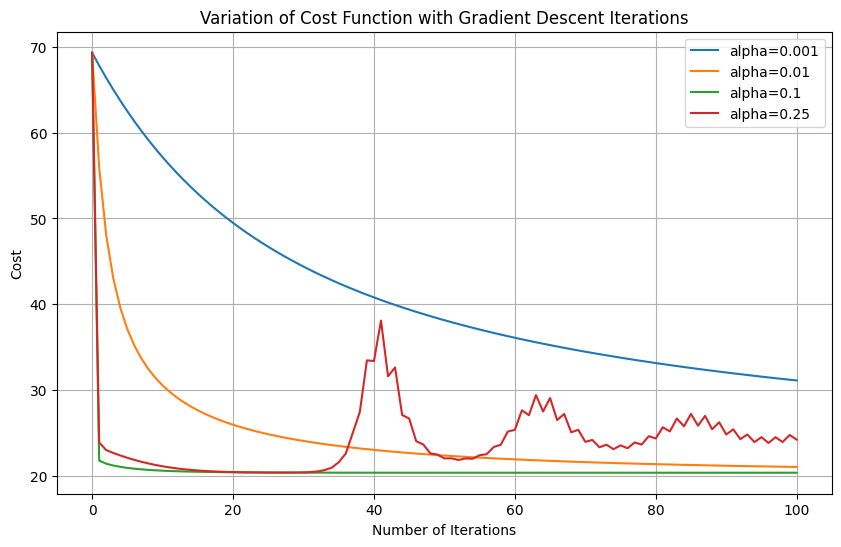

In [27]:
# STUDENT CODE STARTS:
# 抽取特征和目标值
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values  
  
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the learning rates  
learning_rates = [0.001, 0.01, 0.1, 0.25]  
  
# Initialize a list to store the cost history for each learning rate  
cost_history = []


for lr in learning_rates:
    lr_model = LogisticRegression(alpha=lr, tol=1e-4, max_iter=100, penalty='l2', lambd=0.001)
    lr_model.fit(X_scaled, y)
    cost_history.append(lr_model.hist_cost_)
  
# Plot the cost function variation with respect to the number of iterations  
plt.figure(figsize=(10, 6))
for i in range(len(learning_rates)):
    plt.plot(range(len(cost_history[i])), cost_history[i], label=f'alpha={learning_rates[i]}')  
  
plt.title('Variation of Cost Function with Gradient Descent Iterations')  
plt.xlabel('Number of Iterations')  
plt.ylabel('Cost')  
plt.legend()  
plt.grid(True)  
plt.show()  

# STUDENT CODE ENDS

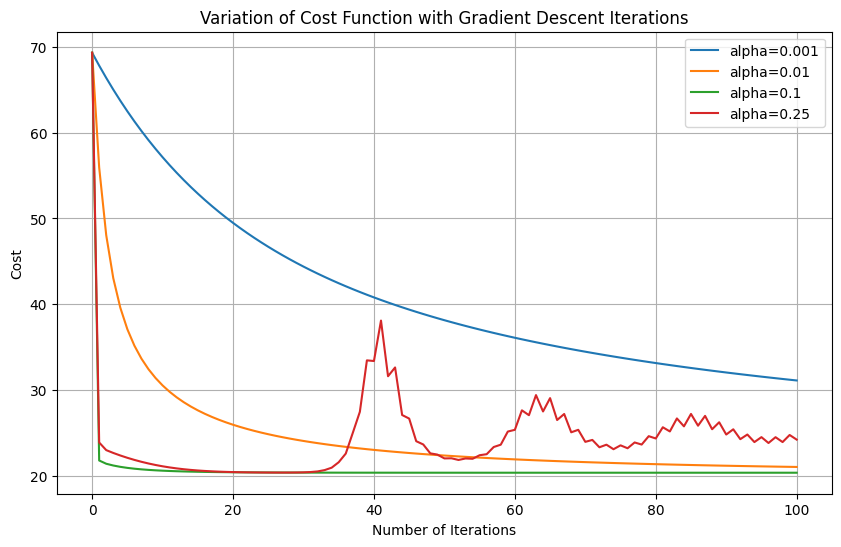

随着学习率的增加，cost函数在初期的下降速度也随之增加。然而，当学习率过高时（例如alpha=0.25），成本函数在迭代过程中出现了较为明显的波动，甚至可能无法收敛到最低点。这表明过高的学习率可能导致算法在寻找最优解的过程中发生震荡，从而无法稳定地减小成本函数。

相对而言，较低的学习率（如alpha=0.001和alpha=0.01）在迭代初期下降速度较慢，但随着迭代次数的增加，成本函数逐渐趋于稳定并达到一个较低的值。这表明较低的学习率虽然收敛速度较慢，但能够较为稳定地找到成本函数的最小值。

在中等学习率（如alpha=0.1）的情况下，成本函数在初期下降较快，同时也能够在一定程度上保持稳定性，避免了过高学习率带来的震荡问题，**但是，随着迭代次数的增加，该学习率也可能会震荡**。

综合各种因素，学习率最好的是**0.01**。

# **3. K-Nearest Neighbors [10 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2d-space will be classified into one of the three classes using its x-coordinate(sepal length) and y-coordinate(sepal width).

## **3.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate X_train with iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate y_train with labels (species)
- return X_train and y_train

In [28]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns: X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # import training data
    iris = datasets.load_iris()

    # TODO:
    # Examine the iris variable and initialize the following variables appropriately:
    # 1. X_train - Shape (m, 2): Only use the sepal length and width
    # 2. y_train - Shape (m, ): target labels 
    #### Student code starts ####
    # iris.data是一个形状为(150, 4)的数组，其中每行代表一个样本，每列代表一个特征  
    # 我们选择前两列，即花萼长度和宽度  
    X_train = iris.data[:, :2]  # 只选择花萼长度和宽度  
    y_train = iris.target  # 选择目标标签 
    return X_train, y_train
    #### Student code ends ####

# Load the iris dataset first
X_train, y_train = load_iris_dataset()

## **3.2. Standardise the Features [4 pts]**
Please complete the standardise_features function to 
standardize the features by subtracting the mean and scaling to unit variance. i.e 

 z = (x - u) / s

where u is the mean of the training data and s is the standard deviation of the training data.

Here, centering and scaling need to happen independently on each feature (column) of the training data.

**Note**: 

Please implement this function yourself. 

**Do NOT use sklearn's StandardScaler**. 

You are encouraged to use numpy as well as numpy vectorisation/broadcasting techniques to speed up the calculations.

In [29]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns: X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # TODO:
  # 1. Calculate columnwise means and standard deviations
  # 2. Perform columnwise standardisation i.e. subtract off mean and divide by standard deviation
  # 3. Return the standardised data
  #### Student code starts ####
  # 1. 计算每列的均值和标准差  
  means = np.mean(X_train, axis=0)  
  stds = np.std(X_train, axis=0)  

  # 2. 对每列进行标准化处理，即减去均值并除以标准差  
  # 注意：我们需要避免除以零，可以通过添加一个小的常数来确保分母不为零  
  stds_plus_eps = stds + 1e-8  # 添加一个非常小的数以防止除以零  
  X_train_standardised = (X_train - means) / stds_plus_eps  

  # 3. 返回标准化后的数据  
  return X_train_standardised 
  #### Student code ends ####

X_train = standardise_features(X_train)

## **3.3. Plot KNN Decision Boundary [6 pts]**
Please complete the plot_KNN_boundary function to
- train a KNN classifier with k neighbors using the provided X_train and y_train
- make predictions using X_test and save the result as 'y_test'

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    '''
    Args:
        k: Number of neighbors to use for kneighbors queries.
        X_train: Training dataset
        y_train: Labels

    Returns:
    Notes:
        1. Please do not change the provided code
        2. save the predicted labels as y_test for plotting
    '''

    # Mesh 2d space into grid to generate X_test and y_test
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # TODO:
    # 1. train a KNN classifier
    # 2. save the predictions on X_test in y_test
    #### Student code starts ####
    # 1. 训练一个KNN分类器  
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)  
  
    # 2. 保存X_test上的预测在y_test中  
    y_test = knn.predict(X_test).reshape(xx.shape)
    
    #### Student code ends ####

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Also plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=map(lambda y: iris_target_names[y], y_train),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel("standardised sepal length")
    plt.ylabel("standardised sepal width")
    plt.show()
# plot_KNN_boundary(3, X_train, y_train)

Explore the effect of changing k on the learned decision boundaries. 
- Submit the plots along with the written homework solutions. 
- State whether the model underfits/overfits as k increases and explain why.

In [31]:
# Plot KNN decision boundaries with different k values
def visualize_KNN(X_train, y_train):

    k_list = [1, 4, 11, 15]
    
    # TODO:
    # 1. Call plot_KNN_boundary function for each value of k in k_list
    #### Student code starts ####  
    # 对每个k值绘制决策边界  
    for k in k_list:
        plot_KNN_boundary(k, X_train, y_train)  
    #### Student code ends ####

# visualize_KNN(X_train, y_train) ### Comment out this line when submitting ###

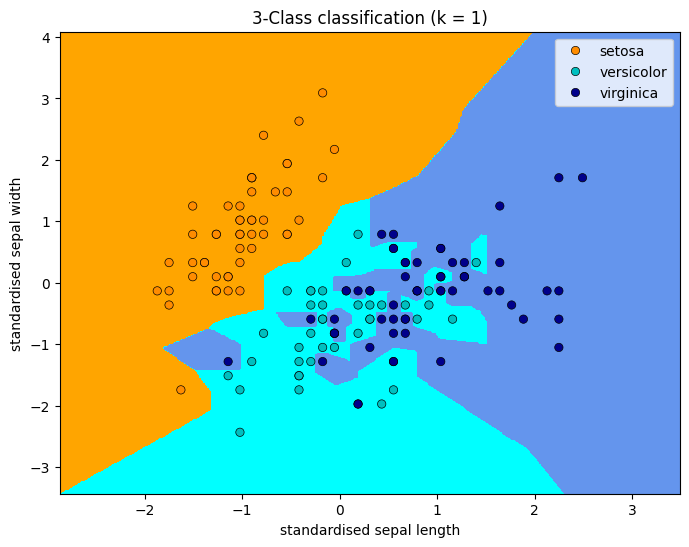
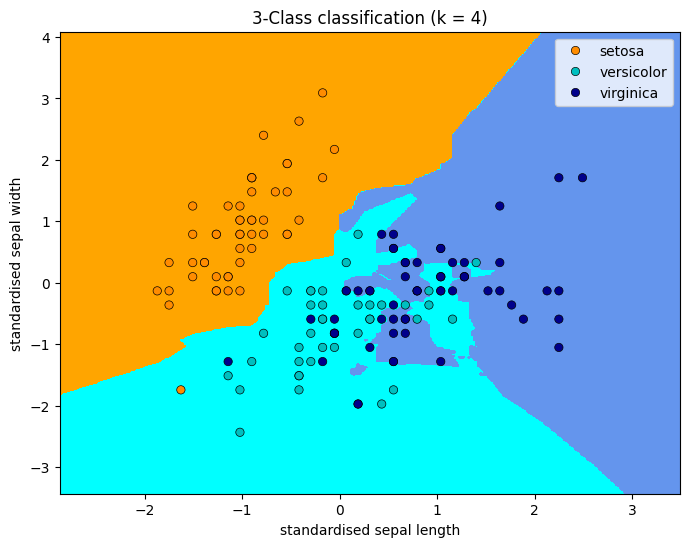
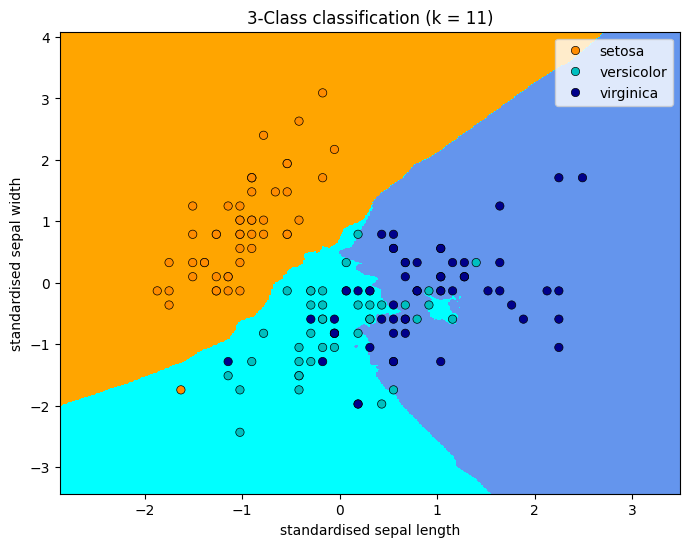
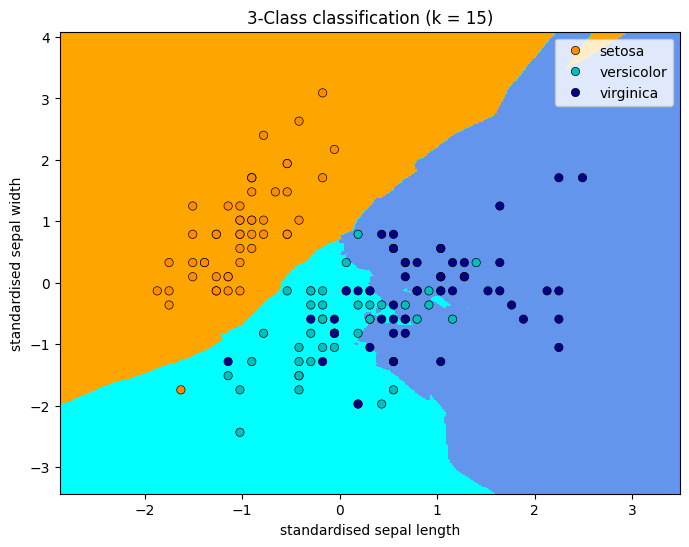

visualize_KNN函数生成的图将直观地说明决策边界是如何随着k的增加而变化的，从复杂和不规则的形状（表示潜在的过拟合）到更简单和更平滑的边界（表示可能的拟合不足）。

低的k值决策边界往往非常复杂和不规则，密切遵循各个训练点的轮廓。这可能导致过拟合，因为模型对单个训练样本的位置非常敏感。

中等的k值随着模型对附近几个点的标签进行平均，决策边界变得更平滑。这可以在拟合训练数据和对看不见的数据进行泛化之间提供良好的平衡。

大的k值决策边界变得更简单、更规则，通常会产生更直的线或更宽的区域。这可能导致拟合不足，因为模型对数据的局部结构不太敏感，更可能平滑重要的细节。

# **4. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index. 

## **4.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$. 



### **4.1.1. Entropy [2 pts]**

Please complete the entropy function.

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):  

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args: 
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node
      
    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO:
    #### Student code starts ####
    ce = - (prob_class1 * np.log2(prob_class1) + (1 - prob_class1) * np.log2(1 - prob_class1))
    return ce
    #### Student code ends #### 

assert cross_entropy(0.5) == 1

### **4.1.2. Gini Index [2 pts]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):  

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args: 
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node
      
    Returns:
        gi: The gini-index value for the node
    """

    # TODO:
    #### Student code starts ####
    prob_class2 = 1 - prob_class1  
      
    # Compute the Gini index  
    gi = prob_class1 * prob_class2 * 2 
      
    return gi
    
    #### Student code ends #### 

assert gini_index(0.5) == 0.5

### **4.1.2. Plot [5 pts]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot. 

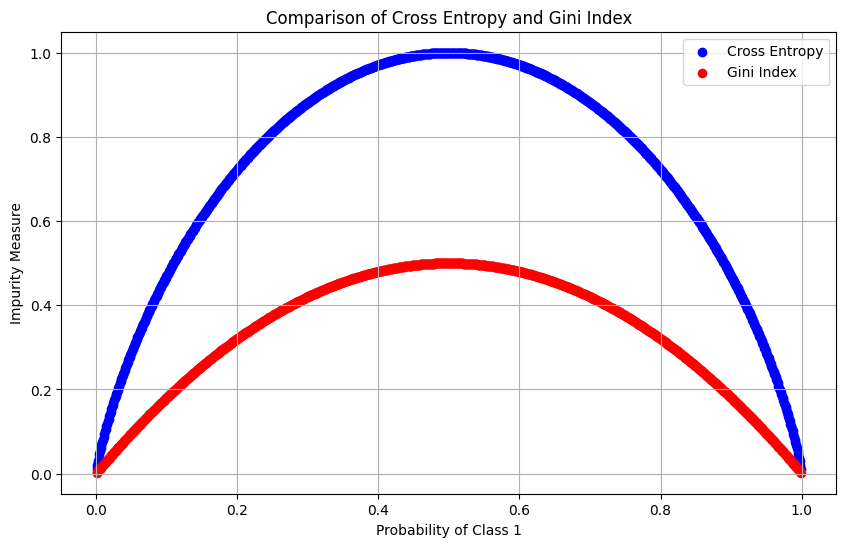

In [34]:
def impurity_measures_plot():

    '''
    Plots the cross entropy and gini index values with respect to the probability values of class 1.

    Args: 

    Returns:

    Notes:
        1. Please do not change the provided code
        2. Both cross entropy and gini index should be on the same scatter plot
    '''

    prob_class1_arr = np.arange(1, 1000)/1000
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # TODO:
    #### Student code starts ####
   # 绘制散点图  
    plt.figure(figsize=(10, 6))  
    plt.scatter(prob_class1_arr, ce_arr, label='Cross Entropy', color='blue')  
    plt.scatter(prob_class1_arr, gi_arr, label='Gini Index', color='red')  
  
    # 设置图例和轴标签  
    plt.legend()  
    plt.xlabel('Probability of Class 1')  
    plt.ylabel('Impurity Measure')  
    plt.title('Comparison of Cross Entropy and Gini Index')  
  
    # 显示网格  
    plt.grid(True)  
  
    # 显示图形  
    plt.show()  
    
    #### Student code ends ####

impurity_measures_plot()

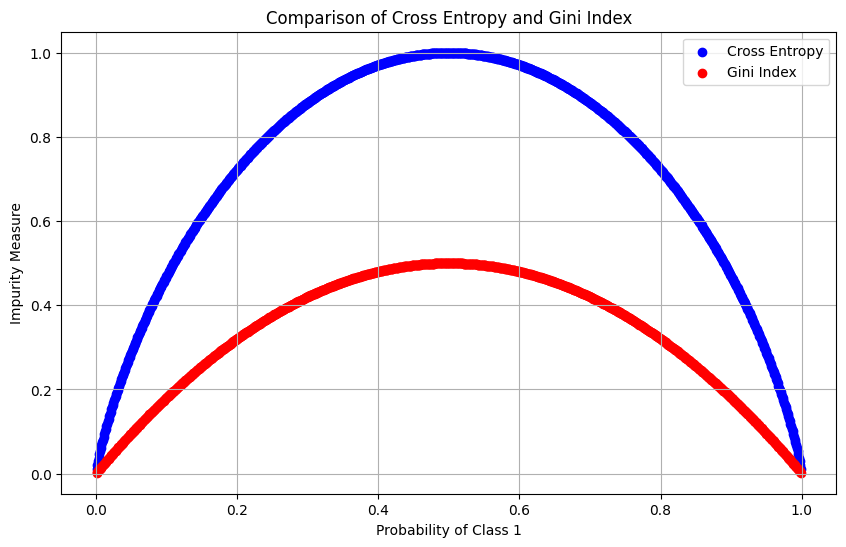

交叉熵和基尼指数都是衡量数据集中类别分布不均匀性的指标。在分类问题中，我们希望每个子集（例如决策树的节点）中的数据尽可能属于同一类别，即具有较高的纯度。交叉熵和基尼指数越低，说明数据集的纯度越高。

从图表中我们可以看到，无论是交叉熵还是基尼指数，随着类别1概率的增加（从0到1），它们的值都呈现先增加后减少的趋势。这意味着当类别分布极端不平衡（即接近0或1）时，数据集的不纯度较低；而当类别分布较为均匀（即接近0.5）时，不纯度最高。这与我们期望的不纯度度量标准是一致的。

## **4.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **4.2.1. Information Gain [3 pts]**

In [35]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args: 
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # TODO:
    # 1. You will need to calculate cross-entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain
    #### Student code starts ####
    # 计算父节点的熵  
    entropy_parent = cross_entropy(num_class1_parent / num_samples_parent)  
      
    # 计算子节点的熵  
    entropy_child1 = cross_entropy(num_class1_child1 / num_samples_child1)

    entropy_child2 = cross_entropy((num_class1_parent - num_class1_child1) / (num_samples_parent - num_samples_child1))
       
    # 计算信息增益  
    ig = entropy_parent - num_samples_child1 / num_samples_parent * entropy_child1 -  (num_samples_parent - num_samples_child1) / num_samples_parent * entropy_child2
      
    return ig 
    
    #### Student code ends ####


assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

### **4.2.2. Gini Reduction [3 pts]**

In [36]:
def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args: 
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # TODO:
    #### Student code starts ####
    # 计算父节点的熵  
    entropy_parent = gini_index(num_class1_parent / num_samples_parent)  
      
    # 计算子节点的熵  
    entropy_child1 = gini_index(num_class1_child1 / num_samples_child1)

    entropy_child2 = gini_index((num_class1_parent - num_class1_child1) / (num_samples_parent - num_samples_child1))
       
    # 计算信息增益  
    ig = entropy_parent - num_samples_child1 / num_samples_parent * entropy_child1 -  (num_samples_parent - num_samples_child1) / num_samples_parent * entropy_child2
      
    return ig 
    
    #### Student code ends ####

assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

# **5. Decision Tree [29 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. 

## **5.1. Load Datasets**

Read the files `diabetes_train_data.csv` and `diabetes_test_label.csv` into train_df and test_df in the `load_diabetes_datasets` function.

In [37]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns: 
        train_df, test_df
    '''
    
    # TODO:
    #### Student code starts ####
    train_df = pd.read_csv("diabetes_train_data.csv")
    test_df = pd.read_csv("diabetes_test_feature.csv")
    return train_df, test_df
    #### Student code ends ####

## **5.2. Preprocess Datasets [10 pts]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets. 

### **5.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features. 

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable. 

### **5.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [38]:
train_df, test_df = load_diabetes_datasets()

# Preprocessing
def preprocess_datasets(train_df, test_df):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column 
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df. 
    '''

    # TODO:
    #### Student code starts ####
    required_cols = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI',   
                     'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC']  
    if not all(col in train_df.columns for col in required_cols):  
        raise ValueError("train_df does not contain all the required columns.")  
      
    train_df = train_df[required_cols].dropna()  
       
    mean_values = train_df.mean()  
    test_df = test_df[required_cols[:-1]].fillna(mean_values)  
      
    return train_df, test_df  
    
    #### Student code ends ####


## **5.3. Decision Tree Training with Pruning [14 pts]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the 
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # TODO:
    #### Student code starts ####
    X = train_df.drop('DIABETIC', axis=1)  
    y = train_df['DIABETIC']
      
    # ccp值  
    ccp_alphas = DecisionTreeClassifier().cost_complexity_pruning_path(X, y)['ccp_alphas'] 
    scores = []
      
    # Perform cross-validation for each ccp_alpha  
    for ccp_alpha in ccp_alphas:  
        model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        scores.append(cross_val_score(model, X, y, cv=5, scoring='f1_macro').mean())
      
    # Find the best ccp_alpha and its score  
    best_idx = np.argmax(scores)  
    best_ccp_alpha = ccp_alphas[best_idx]
    cv_f1_scores = scores[best_idx]  
      
    return best_ccp_alpha, cv_f1_scores  

    #### Student code ends ####

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_ccp_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    # Separate features and target in the training data
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']
    
    # Create a decision tree classifier with the best ccp_alpha
    clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Predict on the test data
    y_test_pred = clf.predict(test_df)
    
    return y_test_pred
    
    #### Student code ends ####

best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
y_test_pred = refit_and_predict(train_df, test_df, best_ccp_alpha)

In [40]:
def cal_accuracy_diabetes(y_test_pred):
    test_df = pd.read_csv("diabetes_test_label.csv")
    test_y = test_df['DIABETIC']
    accuracy = np.mean(y_test_pred == test_y)
    print("accuracy: {}".format(accuracy))
    return accuracy

def cal_f1_score_diabetes(y_test_pred):
    test_df = pd.read_csv("diabetes_test_label.csv")
    test_y = test_df['DIABETIC']
    tp = np.sum((y_test_pred == 1) & (test_y == 1))
    fp = np.sum((y_test_pred == 1) & (test_y == 0))
    fn = np.sum((y_test_pred == 0) & (test_y == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    print("f1_score: {}".format(f1_score))
    return f1_score

acc = cal_accuracy_diabetes(y_test_pred)
f1 = cal_f1_score_diabetes(y_test_pred)

accuracy: 0.9041769041769042
f1_score: 0.2710280373831776


## **5.4. Computing Confidence Intervals [5 pts]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). (Round up the critical value to the second digit below the decimal point) For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [41]:
def calculate_confidence_interval(cv_f1_scores):
    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
    Returns:
        interval    :   np.array, lower bound and upper bound of the 99% confidence interval
    '''
    
    # TODO: this function should be able to handle two confidence levels of 99% and 80%
    #### Student code starts ####
    x = cv_f1_scores.mean()
    s = cv_f1_scores.std(ddof=1)
    t = 4.60
    lower_bound = x - t * s / np.sqrt(5)
    upper_bound = x + t * s / np.sqrt(5)

    return np.array([lower_bound, upper_bound])
    #### Student code starts ####

In [42]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

# **6. Logistic Regression VS. Decision Tree [18pts]**

Let's revisit the Logistic Regression model and compare the performance of it and with Decision Tree on the Diabietes dataset.

## **6.1. Fit the Logistic Regression on Diabetes dataset [5pts]**

Fit a simple logistic regression on the training data using l2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization consant for the l2 penalty  term is 0.001. 
You should be rescaling features using MinMaxScaler from sklearn.preprocessing to make sure that the features are properly scaled for learning.

In [43]:
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df
        test_df

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    # 假设train_df和test_df都已经包含了特征X和目标变量y  
    # 并且它们的列顺序是一致的  
      
    # 分离特征和目标变量  
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    
    X_test = test_df 

    scaler = MinMaxScaler()
    # 必须先进行fit_transform，后进行transform，此时transform会将之前得到的均值的标准差直接应用
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
      
    # 初始化逻辑回归模型  
    model = LogisticRegression(alpha=0.01, max_iter=1000, penalty='l2', lambd=0.001)
    
    # 在训练数据上拟合模型
    model.fit(X_train_scaled, y_train.values)  
    
    # 在测试数据上进行预测  
    y_test_pred = model.predict_proba(X_test_scaled) 
      
    return y_test_pred 
    
    #### Student code ends ####

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)

## **6.2. Fit the Logistic Regression on Diabetes dataset [13pts]**

Find the best alpha that has the highest mean value of f1 scores across 5-fold cross-validation. You should use the same min-max scaler and your candidates for `alpha` should be `[0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05]`. Use the same values for `max_iter`, `lambd` and `penalty` as 5.1. You can still use the `cross_val_score` from scikitlearn here.

In [44]:
import warnings, tqdm

#suppress warnings
warnings.filterwarnings('ignore')

def best_alpha_f1_logistic(train_df):
    """
    Returns the learning rate (alpha) with the highest mean cross-validation F1 score along with the 
    five cross-validation F1 scores corresponding to the alpha(cv_f1_scores).

    Args:
        train_df

    Returns:
        best_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores for the best_alpha

    """

    # TODO:
    #### Student code starts ####

    # 分离特征和目标变量  
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    scaler = MinMaxScaler()
    # 必须先进行fit_transform，后进行transform，此时transform会将之前得到的均值的标准差直接应用
    X_train_scaled = scaler.fit_transform(X_train)

    alpha_list = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05]
    scores = []

    for alpha in alpha_list:
        model = LogisticRegression(alpha=alpha,  max_iter=1000, penalty='l2', lambd=0.001)
        scores.append(cross_val_score(model, X_train_scaled, y_train.values, cv=5, scoring='f1_macro').mean())
    
    # Find the best ccp_alpha and its score  
    best_idx = np.argmax(scores)  
    best_alpha = alpha_list[best_idx]
    cv_f1_scores = scores[best_idx]  
      
    return best_alpha, cv_f1_scores  
    #### Student code ends ####    

def refit_and_predict_logistic(train_df, test_df, best_alpha):
    """
    Fit a logistic regressor on the training data using the best_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    # 分离特征和目标变量  
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    
    X_test = test_df 

    scaler = MinMaxScaler()
    # 必须先进行fit_transform，后进行transform，此时transform会将之前得到的均值的标准差直接应用
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
      
    # 初始化逻辑回归模型  
    model = LogisticRegression(alpha=best_alpha, max_iter=1000, penalty='l2', lambd=0.001)
    
    # 在训练数据上拟合模型
    model.fit(X_train_scaled, y_train.values)  
    
    # 在测试数据上进行预测  
    y_test_pred = model.predict_proba(X_test_scaled) 
    # 如果需要类别预测而不是概率，可以使用 model.predict(X_test)  
      
    return y_test_pred 
    ...
    #### Student code ends ####

best_alpha, cv_f1_scores = best_alpha_f1_logistic(train_df)
y_test_pred_refit_logistic = refit_and_predict_logistic(train_df, test_df, best_alpha)
confidence_interval_logistic = calculate_confidence_interval(cv_f1_scores)
print(best_alpha)

0.005


End of trials, should not be included

# **7. [25 pts] AdaBoost**

In [45]:
import datetime
def prepare_final_cleaned_df(df):
  df = df.drop(["Unnamed: 0"], axis=1)
  df["mdct"] = pd.to_datetime(df["mdct"])
  df.loc[df["gust"].isna(),"gust"] = 0
  df.loc[df["gbrd"].isna(),"gbrd"] = 0
  df.loc[df["wdsp"].isna(),"wdsp"] = 0
  df.loc[df["dewp"].isna(),"dewp"] = 0
  df.loc[df["dmin"].isna(),"dmin"] = 0
  df.loc[df["dmax"].isna(),"dmax"] = 0
  df = df[df["temp"] != 0]
  df = df.drop(columns=["prcp"])

  left_df = df.copy()
  right_df = df.copy()
  right_df["mdct"] = right_df["mdct"].apply(lambda x : x + datetime.timedelta(hours=1))

  columns = ["stp", "smax", "smin", "gbrd", "dewp", "tmax", 
            "dmax", "tmin", "dmin", "hmdy", "hmax",
            "hmin", "wdsp", "wdct", "gust", "temp"]
          
  merged_df = pd.merge(left_df, right_df, "left", on=["wsid","mdct"], indicator=True)
  merged_df = merged_df[merged_df['_merge'] == "both"]

  columns_x = [x + "_x" for x in columns]
  columns_y = [x + "_y" for x in columns]
  
  merged_df[columns] = merged_df[columns_x].values - merged_df[columns_y].values
  merged_df = merged_df.drop(columns=columns_x)
  merged_df = merged_df.drop(columns=columns_y)
  merged_df = merged_df.drop(columns=["_merge", "mdct", "wsid"])

  final_cleaned_df = merged_df.copy()

  final_cleaned_df.loc[final_cleaned_df["temp"] >= 0, "temp" ] = 1
  final_cleaned_df.loc[final_cleaned_df["temp"] < 0, "temp" ] = 0
  return final_cleaned_df

## **7.1.  [3 pts] Logistic regression with sample weights**

As you will have learnt from the lectures, AdaBoost fits weak learners (here, logistic regression model)  in each iteration, to a dataset with weights $w_i$ attached to each sample $(x_i, y_i)$. The loss function now becomes:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N w_{i} \times [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where $h_\theta(x)$ is the logistic regression hypothesis function.

The gradient of this weighted loss function with respect to the weight $\theta_j$ is given by:

> $\frac{\partial \mathcal{L}({\theta})}{\partial \theta_j} = \sum_{i=1}^{N}w_{i}(h_{{\theta}}({x}_i) - y_i)x_{ij}$

Using this information, complete the `compute_gradient` method in the `LogisticRegression` class to account for sample weights.

In [46]:
class LogisticRegression:
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.1
        Learning rate
    tol : float, default=0.01
        Tolerance for stopping criteria
    max_iter : int, default=1000
        Maximum number of iterations of gradient descent

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    converged_: boolean
        Boolean value indicating whether gradient descent converged or not
    """

    def __init__(self, alpha=0.1, tol=0.01, max_iter=1000):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter

        self.theta_ = None
        self.converged_ = False

    def compute_gradient(self, theta, X, y, sample_weight):
        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array
        sample_weight: numpy.ndarray of shape (N,)
            The sample weight array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        y_hat = sigmoid(X.dot(theta))

        # STUDENT TODO: Compute the gradient
        gradient = np.nansum(np.multiply(sample_weight, (y_hat - y)).reshape(-1, 1) *  X, axis=0)
        return gradient
        # STUDENT TODO END

    def fit(self, X, y, sample_weight):
        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array
        sample_weight: numpy.ndarray of shape (N,)
            The sample weight array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        theta_old = np.zeros((D + 1,))
        theta_new = theta_old.copy()

        for i in range(self.max_iter):
            theta_new = theta_old - self.alpha * self.compute_gradient(theta_old, X, y, sample_weight)

            if np.linalg.norm(theta_new - theta_old) / (np.linalg.norm(theta_old) + self.tol) <= self.tol:
                self.converged_ = True
                break
            
            theta_old = theta_new.copy()

        self.theta_ = theta_new

    def predict_proba(self, X):
        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        
        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        y_hat = sigmoid(X.dot(self.theta_))
        return y_hat

    def predict(self, X):
        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        y_hat = self.predict_proba(X)
        y_pred = y_hat.copy()
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

### Test case for the `compute_gradient` method

In [47]:
def test_compute_gradient(StudentLogisticRegression):
    
    student_lr_clf = StudentLogisticRegression()
    np.random.seed(0)
    theta_tc = np.random.randn(2)
    X_tc = np.random.randn(100, 2)
    y_tc = np.random.randint(0, 2, 100)
    sample_weight_tc = np.random.uniform(0, 1, 100)
    student_ans = student_lr_clf.compute_gradient(theta_tc, X_tc, y_tc, sample_weight_tc)
    required_ans = np.array([12.903225675830651, -1.0829605960182223])
    assert np.linalg.norm(student_ans - required_ans) < 1e-2 * required_ans.size

test_compute_gradient(LogisticRegression)

## **7.2. [20 pts] AdaBoostClassifier Implementation**

In this section, you will be implementing the AdaBoost classifier with the logistic regression weak learner from above.

### **7.2.1. [12 pts] Follow the hints in the `fit` method in the `AdaBoostClassifier` class to implement the following algorithm.**

Use the following Adaboost pseudocode as a reference.

**INPUT:**

1. training data $X, y = \{(x_{i}, y_{i})\}_{i=1}^N$

2. number of iterations $T$

**ALGORITHM:**

1.   Initialize $N$ uniform weights, i.e., $w_{1} = [1/N, 1/N, ..., 1/N]$

2.   `For` $t = 1, 2, ... T$:

> 2.1. Train model $h_t$ on $X$ and $y$ with instance weights $w_{t}$

> 2.2. Compute the weighted training error rate of $h_{t}$: $\epsilon_{t} = \sum_{i: y_i \ne h_t(x_i)} w_{t,i}$

> 2.3. If $\epsilon_{t} > 0.5$, flip $h_t$'s predictions

> 2.4. Set $\beta_{t} = \frac{1}{2}\text{ln}\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$

> 2.5. Update all instance weights: $w_{t + 1,i} = w_{t,i}\times\text{exp}(-\beta_{t}y_{i}h_{t}(x_{i}))$ $\forall i = 1, 2, ..., N$

> 2.6. Normalize $w_{t+1}$ such that the elements sum to 1

> `End For`

### **7.2.2. [8 pts] Follow the hints in the `predict` method in the `AdaBoostClassifier` class for obtaining the predictions of the trained AdaBoost classifier.**

> $H(x) = \text{sign}\left(\sum_{t=1}^{T}\beta_{t}h_{t}(x)\right)$

In [48]:
class AdaBoostClassifier:
    """
    AdaBoost classifier based on logistic regression

    Parameters
    ----------
    T: int, default=100
        The number of logistic regression models in the boosting model

    Attributes
    ----------
    beta_arr_ : list of length T
        The list of beta values in the boosting model

    h_arr_: list of length T
        The list of logistic regression models in the boosting model
    """

    def __init__(self, T=100):

        self.T = T

        self.beta_arr_ = []
        self.h_arr_ = []

    def fit(self, X, y):
        """
        Train the logistic regression models (h) and compute their coefficients (beta), 
        and store them in h_arr_ and beta_arr_ respectively.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N = X.shape[0]

        # STUDENT TODO: Initialize w with appropriate values
        w = np.ones(N) / N  # 初始化权重为均匀分布
        # STUDENT TODO END

        y_ = y.copy()
        # STUDENT TODO: Update y_ such that the 0's in y_ are replaced by -1
        y_[y_ == 0] = -1  # 将0替换为-1
        # STUDENT TODO END

        for t in range(self.T):
            h = LogisticRegression()

            # STUDENT TODO: 
            # Fit h to X and y using w as the sample weights
            h.fit(X, y, sample_weight=w)
            # Obtain the predictions from h and compute epsilon
            y_pred = h.predict(X)
            epsilon = np.sum(w * (y != y_pred))  # 计算加权错误率

            # If epsilon > 0.5:
            # 1. flip the predictions, i.e., replace 1's with 0's and 0's with 1's
            # 2. invert the model (h), i.e., make it predict 1 for what it predicted 0 earlier and vice-versa (clue: think about modifying h.theta_)        
            if epsilon > 0.5:  
                y_pred[y_pred == 0] = 1
                y_pred[y_pred == 1] = 0
                h.theta_ *= -1  # 反转模型
            # STUDENT TODO END

            self.h_arr_.append(h)

            if epsilon == 0:
                beta = np.inf
                self.beta_arr_.append(beta)
                break
            
            # STUDENT TODO: Compute beta
            beta = np.log((1 - epsilon) / epsilon) / 2
            # STUDENT TODO END

            self.beta_arr_.append(beta)
            y_pred_ = y_pred.copy()

            # STUDENT TODO: 
            # Update y_pred_ such that the 0's in y_pred_ are replaced by -1
            y_pred_ = h.predict(X)  
            # y_pred_[y_pred_ == 1] = 0  
            y_pred_[y_pred_ == 0] = -1  # 更新预测结果  

            # Update w and normalize it such that the values in w sum to 1
            w *= np.exp(-y_ * y_pred_ * beta)
            w /= np.sum(w)  # 归一化权重
            # STUDENT TODO END

    def predict(self, X):
        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """
        
        N = X.shape[0]
        
        # Initialize the summation of beta times h for each x_i 
        sum_beta_times_h = np.zeros((N,))

        for t in range(len(self.h_arr_)):

            # STUDENT TODO: 
            # Obtain the predictions of the t-th model in self.h_arr_
            predictions = self.h_arr_[t].predict(X)
            # Replace the 0's in the array with -1
            predictions[predictions == 0] = -1 
            # Update sum_beta_times_h
            sum_beta_times_h += self.beta_arr_[t] * predictions

        # Create an array `y_pred` for the final predictions
        # Fill 0's and 1's in `y_pred` depending on the sum_beta_time_h value in the corresponding location
        y_pred = (sum_beta_times_h > 0).astype(int)
        return y_pred
        # STUDENT TODO END


### Test case for the `fit` method

In [49]:
def test_adaboost_fit(StudentAdaBoostClassifier):

    T = 4
    N = 100
    D = 2

    student_ab_clf = StudentAdaBoostClassifier(T=T)
    np.random.seed(0)
    X_tc = np.random.randn(N, D)
    y_tc = np.random.randint(0, 2, N)
    student_ab_clf.fit(X_tc, y_tc)

    beta_arr_student_ans = student_ab_clf.beta_arr_
    beta_arr_required_ans = np.array([0.08017132503758954, 0.046732864002838985, 
                                      0.022808008179707476, 0.07012335626140642])
    assert np.linalg.norm(beta_arr_student_ans - beta_arr_required_ans) < 1e-2 * beta_arr_required_ans.size

    h_arr_student_ans = np.zeros([T, D + 1])

    for indx, h in enumerate(student_ab_clf.h_arr_):
        h_arr_student_ans[indx] = h.theta_

    h_arr_required_ans = np.array([[-0.01514967, -0.01713051,  0.21344566],
                                   [-0.01738886, -0.00656722,  0.12035635],
                                   [-0.0132557,  -0.00428943, 0.06616284],
                                   [-0.01037174, -0.00334141,  0.03943088]])

    assert np.linalg.norm(h_arr_student_ans - h_arr_required_ans) < 1e-2 * h_arr_required_ans.size

test_adaboost_fit(AdaBoostClassifier)

### Test case for the `predict` method

In [50]:
def test_adaboost_predict(StudentAdaBoostClassifier):

    T = 4
    N = 100
    D = 2

    student_ab_clf = StudentAdaBoostClassifier(T=T)
    np.random.seed(0)
    X_tc = np.random.randn(N, D)
    y_tc = np.random.randint(0, 2, N)
    student_ab_clf.fit(X_tc, y_tc)

    student_ans = student_ab_clf.predict(X_tc)
    required_ans = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 
                    0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
                    1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 
                    0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 
                    1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]

    assert np.mean(student_ans == required_ans) >= 0.98

test_adaboost_predict(AdaBoostClassifier)

## **7.3. [2 pts] AdaBoost on the dataset**

Follow the hints in the `adaboost_on_dataset` method in the below cell to run `AdaBoostClassifier` on the dataset.

In [51]:
# Load Dataset
df = pd.read_csv("observations_train_data.csv")
train_df = prepare_final_cleaned_df(df)
test_df = pd.read_csv("observations_test_data.csv")
test_df = prepare_final_cleaned_df(test_df)

test_df_label = test_df["temp"]
test_df = test_df.drop(columns=["temp"])

In [52]:
from sklearn.preprocessing import StandardScaler
def adaboost_on_dataset():
    """
    Trains the AdaBoostClassifier on a real-world dataset.

    Parameters
    ----------
    Nothing

    Returns
    -------
    y_test_pred: numpy.ndarray
        The predicted classes of the datapoints in test_df
    """

    # STUDENT TODO START: Initialize X_train and y_train with appropriate values (clue: use .iloc followed by .values of the DataFrame class)
    X_train = train_df.iloc[:, :-1].values  # 所有行，除了最后一列的所有列  
    y_train = train_df.iloc[:, -1].values   # 所有行，最后一列

    # STUDENT TODO END

    # STUDENT TODO START: Initialize X_test
    X_test = test_df.values
    # STUDENT TODO END
    
    scaler = StandardScaler()
    # STUDENT TODO START: Scale the features of X_train and X_test using scaler
    # 使用scaler标准化训练集和测试集的特征  
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test)
    # STUDENT TODO END

    clf = AdaBoostClassifier(T=10)
    # STUDENT TODO START: Now fit clf to the entire training data, i.e., X_train and y_train after feature scaling
    clf.fit(X_train_scaled, y_train)
    # STUDENT TODO END

    # STUDENT TODO START: Predict the classes of the datapoints in X_test and return the result
    y_test_pred = clf.predict(X_test_scaled)
    return y_test_pred
    # STUDENT TODO END

In [53]:
def cal_accuracy_student(y_test_pred):
    accuracy = np.mean(y_test_pred == test_df_label)
    print("accuracy: {}".format(accuracy))
    return accuracy

def cal_f1_score_student(y_test_pred):
    tp = np.sum((y_test_pred == 1) & (test_df_label == 1))
    fp = np.sum((y_test_pred == 1) & (test_df_label == 0))
    fn = np.sum((y_test_pred == 0) & (test_df_label == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    print("f1_score: {}".format(f1_score))
    return f1_score
y_test_pred = adaboost_on_dataset()
acc = cal_accuracy_student(y_test_pred)
f1 = cal_f1_score_student(y_test_pred)

accuracy: 0.8881118881118881
f1_score: 0.8801652892561984


# **8. [8 pts] XGBoost**

## TODOs for this section:
- You'll use xgboost library to build a classifier for the above problem. XGBoost is a popular library for gradient boosting, and you can find its documentation [here](https://xgboost.readthedocs.io/en/latest/). 
- You need to get at least 0.75 accuracy on the test set to receive full credits.

In [54]:
# Load Dataset
df = pd.read_csv("observations_train_data.csv")
train_df = prepare_final_cleaned_df(df)
test_df = pd.read_csv("observations_test_data.csv")
test_df = prepare_final_cleaned_df(test_df)

test_df_label = test_df["temp"]
test_df = test_df.drop(columns=["temp"])

In [55]:
import xgboost as xgb

# STUDENT TODO STARTS: 
# 1. Fit an xgboost classifier to the training data (train_df, target variable is temp) 
# 2. Obtain the predictions of the trained model on test_df in the variable y_test_pred
# 3. Tune the hyperparameters such that you pass the autograder threshold accuracy of 0.75
# 初始化XGBoost分类器
xgb_clf = xgb.XGBClassifier()  
  
X_train = train_df.drop(columns=["temp"])
y_train = train_df["temp"]
# 使用默认参数训练分类器  
xgb_clf.fit(X_train, y_train)

# 预测测试集  
y_test_pred = xgb_clf.predict(test_df) 

# STUDENT TODO ENDS

In [56]:
acc = cal_accuracy_student(y_test_pred)
f1 = cal_f1_score_student(y_test_pred)

accuracy: 0.9488787074993972
f1_score: 0.9467068878833585


# **9. [25 pts] K-means Clustering**

We will implement the k-means clustering algorithm using the Breast Cancer dataset. As with all unsupervised learning problems, our goal is to discover and describe some hidden structure in unlabeled data. The k-means algorithm, in particular, attempts to determine how to separate the data into <em>k</em> distinct groups over a set of features ***given that we know (are provided) the value of k***.

Knowing there are <em>k</em> distinct 'classes' however, doesn't tell anything about the content/properties within each class. If we could find samples that are representative of each of these *k* groups, then we could label the rest of the data based on how similar they are to each of the prototypical samples. We will refer to these representatives as the centroids (cluster centers) that correspond to each cluster.

## **9.1. Import the dataset**

In [57]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

## TODO your code here ##
"""
First load the dataset X from cancer_dataset.
X -  (m, n) -> m x n matrix where m is the number of training points = 569 and n is the no of features = 30
"""
X = cancer_dataset.data  # 特征数据
## TODO end ##

## **9.2. [12 pts] K-means clustering implementation** 

We will first implement a class for k-means clustering.<br>
These are the main functions: <br>
- `__init__`: The initialiser/constructor (This is implemented for you)
- `fit`: Entrypoint function that takes in the dataset (X) as well as centroid initialisations and returns: 
    - the cluster labels for each row (data point) in the dataset
    - list of centroids corresponding to each cluster 
    - no of iterations taken to converge.

Inside fit() function, you will need to implement the actual kmeans functionality. <br>
The K-means process you should follow is listed below:
1. Initialize each of the k centroids to a random datapoint if initialisation is not provided.
2. Update each datapoint's cluster to that whose *centroid* is closest
3. Calculate the new *centroid* of each cluster
4. Repeat the previous two steps until no centroid value changes. Make sure you break out of the loop reagrdless of whether you converged or not once max iterations are reached.

To help streamline this process, three helper functions have been given to you in the KMeans class \
- compute_distance(): use for step-2 above
- find_closest_cluster(): use for step-2 above
- compute_centroid(): use for step-3 above

In [58]:
class KMeans:
    '''Implementing Kmeans clustering'''

    def __init__(self, n_clusters, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def compute_centroids(self, X, clusters):
        """
        Computes new centroids positions given the clusters
        
        INPUT:
        X - m by n matrix, where m is the number of training points
        clusters -  m dimensional vector, where m is the number of training points 
                    At an index i, it contains the cluster id that the i-th datapoint 
                    in X belongs to.
        
        OUTPUT:
        centroids - k by n matrix, where k is the number of clusters.
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        # TODO your code here
        for centroid_id in range(self.n_clusters):  
            indices = np.where(clusters == centroid_id)[0]  
            if indices.size > 0:  
                centroids[centroid_id] = np.mean(X[indices], axis=0) 
        ## TODO end ##
        return centroids

    def compute_distance(self, X, centroids):
        """
        Computes the distance of each datapoint in X from the centroids of all the clusters
        
        INPUT:
        X - m by n matrix, where m is the number of training points
        centroids - k by n matrix, where k is the number of clusters
        
        OUTPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.
        
        """
        dist = np.zeros((X.shape[0], self.n_clusters))
        # TODO your code here
        # 使用广播来计算X中每个点与centroids中每个中心的差的平方  
        diff_squared = (X[:, np.newaxis, :] - centroids)**2  
          
        # 沿着最后一个轴（特征轴）求和，然后开方得到距离  
        dist = np.sqrt(diff_squared.sum(axis=2))  

        ## TODO end ##
        return dist

    def find_closest_cluster(self, dist):
        """
        Finds the cluster id that each datapoint in X belongs to
        
        INPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.
        
        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points 
                    At an index i, it contains the cluster id that the i-th datapoint 
                    in X belongs to.
        
        """
        clusters = np.zeros(dist.shape[0])
        # TODO your code here
        clusters = np.argmin(dist, axis=1) 
        ## TODO end ##
        return clusters
    
    def fit(self, X, init_centroids=None):
        """
        Fit KMeans clustering to given dataset X. 
        
        INPUT:
        X - m by n matrix, where m is the number of training points
        init_centroids (optional) - k by n matrix, where k is the number of clusters
        
        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points 
                    At an index i, it contains the cluster id that the i-th datapoint 
                    in X belongs to.
        centroids - k by n matrix, where k is the number of clusters. 
                    These are the k cluster centroids, for cluster ids 0 to k-1
        iters_taken - total iterations taken to converge. Should not be more than max_iter.
        
        """
        # Fix random seed. Do not change this!
        np.random.RandomState(111)

        ## TODO your code here ##
        # Initialise centroids to random points in the dataset if not provided (i.e. None)
        if init_centroids is None:    
            rand_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)  
            init_centroids = X[rand_idx, :]  

        # Iterate until kmeans converges or max_iters is reached. In each iteration: 
        #  - Update each datapoint's cluster to that whose *centroid* is closest
        #  - Calculate the new *centroid* of each cluster
        #  - Repeat the previous two steps until no centroid value changes. 
        iters_taken = 0 
        centroids = init_centroids
        while True:  
            clusters = self.find_closest_cluster(self.compute_distance(X, centroids))  
  
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])  
   
            if np.all(centroids == new_centroids):  
                break  
  
            centroids = new_centroids  
            iters_taken += 1  
  
            if iters_taken >= self.max_iter:  
                break  
  
        return clusters, centroids, iters_taken  
        ## TODO end ## 

In [59]:
# test case centroids should be aroudn (1.5,1.5) and (4.5,4.5)
points = []
result = []
random.seed(0)
for _ in range(500):
    x = random.random()*3
    y = random.random()*3
    points.append((x,y))
    result.append(0)
for _ in range(500):
    x = random.random()*3 + 3
    y = random.random()*3 + 3
    points.append((x,y))
    result.append(1)
clf = KMeans(2)
points = np.asarray(points)

In [60]:
#test for sanity check
def test_compute_centroids():
  clf = KMeans(2)
  centroid_p = clf.compute_centroids(np.array(points),np.array(result))
  centroid_r = [[1.5185255, 1.45970038],
 [4.51568108,4.54138552]]
  assert(np.linalg.norm(centroid_p - np.array(centroid_r)) <= 1e-2 )
test_compute_centroids()

In [61]:
def test_distance():
    centroid_r = [[1.5185255, 1.45970038],
      [4.51568108,4.54138552]]
    clf = KMeans(2)
    distance = clf.compute_distance(np.array(points),np.array(centroid_r))
    distance_for_0 = [1.30098366, 3.01191447]
    assert(np.linalg.norm(distance_for_0-distance[0]) <= 1e-2)
test_distance()

In [62]:
def test_find_clusters():
  centroid_r = [[1.5185255, 1.45970038],
      [4.51568108,4.54138552]]
  clf = KMeans(2)
  distance = clf.compute_distance(np.array(points),np.array(centroid_r))
  cluster = clf.find_closest_cluster(distance)
  assert(cluster[0] == 0)
test_find_clusters()

In [63]:
def test_fit():
  clf = KMeans(2)
  clusters, centroids, _ = clf.fit(np.array(points),np.array([[1,1],[4,4]]))
  centroid_r = [[1.5185255, 1.45970038],
      [4.51568108,4.54138552]]
  assert(np.linalg.norm(centroids - np.array(centroid_r)) <= 1e-2 )
  assert(sum(np.array(clusters)-np.array(result)) == 0)
test_fit()

## **9.3. [3 pts] Compute distortion**

As you may have noticed already, one big question still remains. How do we know what value of k to choose?

One way to decide on a value for k is to run k-means and plot the distortion (sum of squared error based on the Euclidean distance). From that we can find the "elbow of the graph" that indicates the best tradeoff between number of clusters and corresponding distortion.

In the function `test_cluster_size`,  iterate over possible cluster sizes from 2 to a `max_cluster` (inclusive) value. For each *k*, run k-means and calculate its distortion.

In [74]:
def test_cluster_size(X, max_k):
    """
    Iterates over possible cluster from 2 to max_k, running k-means and calulating distortion.
    
    INPUT:
    X - m by n matrix, where m is the number of training points
    max_k - the maximum number of clusters to consider
    
    OUTPUT:
    scores - a list of scores, that contains the distortion for k = 2 to max_k, in order.
    """
    scores = [0] * (max_k-1)
    ## TODO your code here ##
    for k in range(2, max_k + 1):  
        # Initialize and fit the KMeans model  
        kmeans = KMeans(n_clusters=k)  
        clusters, centroids, iters_taken = kmeans.fit(X)  

        score = 0
        for i in range(X.shape[0]):
            score += ((X[i] - centroids[clusters[i]]) ** 2).sum() 
          
        # Add the distortion score to the list 
        scores[k-2] =score      
    ## TODO end ##
    return scores

In [65]:
def test_test_cluster_size():
  scores = test_cluster_size(np.array(points),5)
  assert(np.argmax(scores) == 0)
test_test_cluster_size()

## **9.4. [3 pts] Plot distortion vs. k (without feature scaling)** 

Plot distortion vs. different k values by using the function we just wrote on dataset X and add it in the written report. Use max_k = 20. Determine the best k value from this plot and also mention it in the written report. Make sure your plot has axes labels, legend and title.

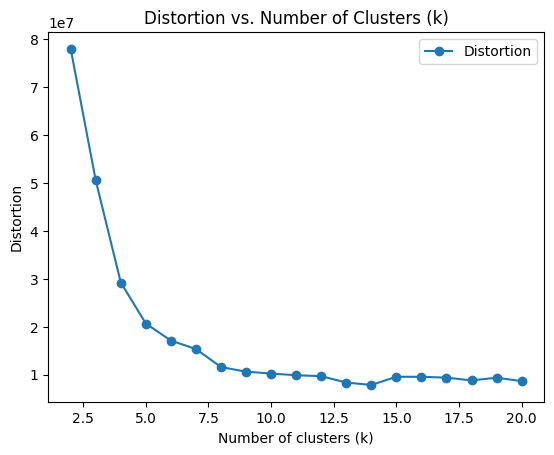

In [66]:
## TODO your code here ##
max_k = 20
scores = test_cluster_size(X, max_k)  
  
plt.plot(range(2, max_k + 1), scores, marker='o')  
  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('Distortion')  
plt.title('Distortion vs. Number of Clusters (k)')  
plt.legend(['Distortion'])  
 
plt.show()  
## TODO end ##

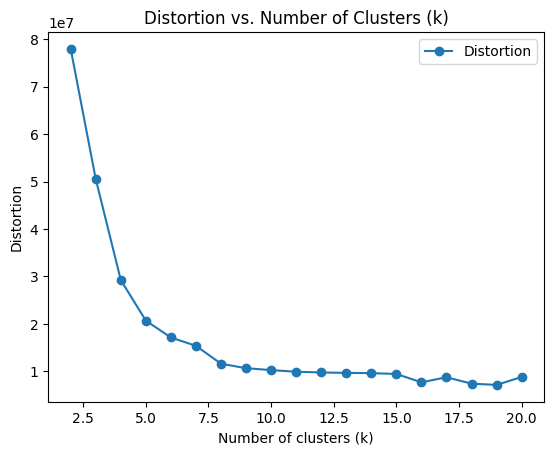

从图中可看出手肘点为$k=5$。

## **9.5. [3 pts] Plot distortion vs. k (with feature scaling)** 

What we just did was running k-means clustering over the dataset X without any feature scaling. This time, we will rescale each feature to the standard range of (0,1) before passing it to k-means and computing the distortion.

Use `sklearn.preprocessing.MinMaxScaler` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) and scale the dataset X before passing it to the `test_cluster_size` function. As before, plot distortion vs. different k values and add it in the written report. Use max_k = 20. Determine the best k value from this plot and also mention it in the written report. Make sure your plot has axes labels, legend and title.

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

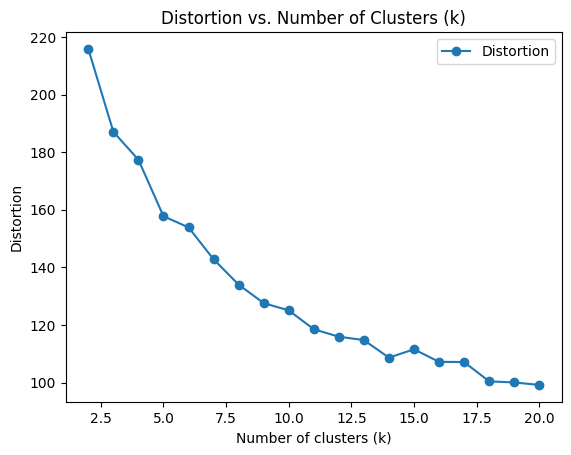

In [75]:
## TODO your code here ##
# Use min-max scaler to scale the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
max_k = 20
scores = test_cluster_size(X, max_k)
  
# Plot the distortion scores  
plt.plot(range(2, max_k + 1), scores, marker='o')  
  
# Add axes labels, legend, and title  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('Distortion')  
plt.title('Distortion vs. Number of Clusters (k)')  
plt.legend(['Distortion'])  
  
# Show the plot  
plt.show()  

## TODO end ##

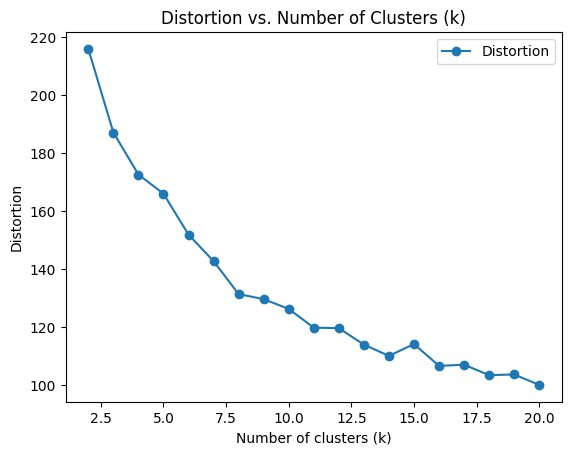

从图中可看出手肘点为$k=8$。

## **9.6. [4 pts] Comments**

Answer these questions in the written report.

1. Why do you get different results with and without feature scaling?
2. Should you scale the features before fitting k-means? Why or why not?

1. 在有和没有特征缩放的情况下得到不同的结果，主要是因为K-Means算法是基于距离的聚类方法。特征缩放（如标准化或归一化）会改变特征之间的相对尺度，从而影响数据点之间的距离计算。在没有特征缩放的情况下，如果某个特征的取值范围远大于其他特征，那么这个特征在K-Means算法中的权重就会过大，导致算法更多地基于这个特征进行聚类，而忽略了其他可能同样重要的特征。这可能导致聚类结果偏向于该特征，而不能准确地反映数据的整体结构。通过特征缩放，我们可以将所有特征缩放到相同的尺度上，使得每个特征在聚类过程中的贡献相对平等。这样，K-Means算法就能更全面地考虑所有特征，从而得到更准确的聚类结果。
2. 在拟合K-Means之前，通常建议缩放特征。这是因为K-Means算法对特征的尺度敏感，如上所述，不同尺度的特征会导致算法偏向于某些特征，从而影响聚类结果。通过缩放特征，我们可以确保每个特征在聚类过程中具有相同的权重，使算法能够更全面地考虑所有特征。这有助于避免由于特征尺度差异而导致的聚类偏差，提高聚类的准确性和稳定性。

# **10. [18 pts] Principal Component Analysis** 

## **10.1. [8 pts] Exploring Effects of Different Princple Components in Linear Regression**
We have introduced you a way of dimension reduction, Principal Component Analysis, in class. Now, we would like to ask you to apply PCA from sklearn on the breast cancer dataset to observe its performance and interpret the major components.

In order to better compare the effects of PCA, we load the labels from the dataset.

Then, we will evaluate the performances of raw dataset and various numbers of pca components on LinearRegression classifier.

In the section, you are asked to draw a plot of test accuracies vs number of different principle components. The detailed instructions are included in the following cells.

Remember to **attach the plot** in your written submission, and also **make comments** about what you observe, explain the reason behind the trend, and what conclusion you could draw from the graph.

In [68]:
# load the label from the dataset, which is a binary label 0/1 representing whether the cancer is benign or malignant

## TODO your code here ##
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
X = cancer_dataset.data
y = cancer_dataset.target
## TODO end ##

Raw data has accuracy:  0.9468085106382979
PCA with 1 components has accuracy: 0.8776595744680851
PCA with 2 components has accuracy: 0.8882978723404256
PCA with 3 components has accuracy: 0.8776595744680851
PCA with 4 components has accuracy: 0.9308510638297872
PCA with 5 components has accuracy: 0.9308510638297872
PCA with 6 components has accuracy: 0.9361702127659575
PCA with 7 components has accuracy: 0.9361702127659575
PCA with 8 components has accuracy: 0.9361702127659575
PCA with 9 components has accuracy: 0.9308510638297872


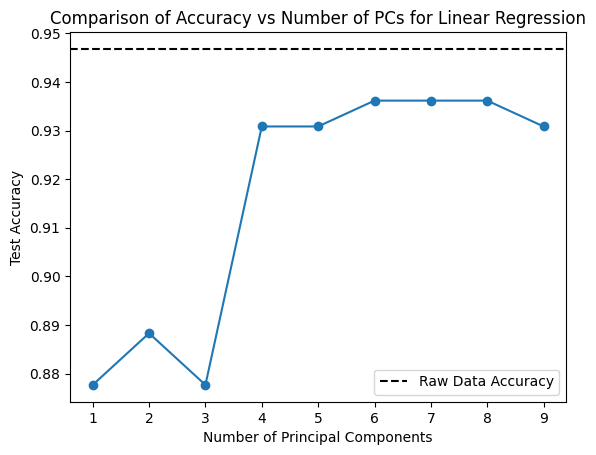

In [69]:
# try raw data vs PCA data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## TODO your code here ##
# Step 1: split the data into train and test set by a test_size of 0.33.
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.33)
# Step 2: Train a linear regression model using train set and predict on the test set.
# As the labels are binary, we should cast the predictions into binary labels as well. (Set predictions >=0.5 as 1)
model_raw = LinearRegression()  
model_raw.fit(X_train_raw, y_train_raw)  
y_pred_raw = model_raw.predict(X_test_raw)  
# 将预测值转换为二分类标签  
y_pred_raw_binary = (y_pred_raw >= 0.5).astype(int)  
# 计算准确率  
raw_accu = np.sum(y_pred_raw_binary == y_test_raw) / len(y_pred_raw_binary)
# You might want to print out accuracy scores here
print("Raw data has accuracy: ", raw_accu)


# Step 3: Iterate the number of components from 1 to 10 (exclusive). 
# For each number of PCs, we are training a linear regression model and save its accuracy on the test set following the same style as above.
# Remeber to only fit the train set and not the test set. 
# You might want to store your accuracies in a list
accuracies = []
for n_components in range(1, 10):  
    pca = PCA(n_components=n_components)  
    X_train_pca = pca.fit_transform(X_train_raw)  
    X_test_pca = pca.transform(X_test_raw)  
      
    model_pca = LinearRegression()  
    model_pca.fit(X_train_pca, y_train_raw)  
    y_pred_pca = model_pca.predict(X_test_pca)  
    y_pred_pca_binary = (y_pred_pca >= 0.5).astype(int)  
    accu = np.sum(y_pred_pca_binary == y_test_raw) / len(y_pred_pca_binary)  
    accuracies.append(accu)  
    print(f"PCA with {n_components} components has accuracy: {accu}")  

# Step 4: Make a plot to compare accuracy vs number of PCs on Linear Regression for the test set.
# Add a black, dashed line for the test accuracy of linear regression by feeding the raw input data.
# Remeber to add x, y labels and title to your plot, and comment on your observations.
plt.plot(range(1, 10), accuracies, marker='o')  
plt.axhline(y=raw_accu, color='black', linestyle='--', label='Raw Data Accuracy')  
plt.xlabel('Number of Principal Components')  
plt.ylabel('Test Accuracy')  
plt.title('Comparison of Accuracy vs Number of PCs for Linear Regression')  
plt.legend()  
plt.show() 

## TODO end ##

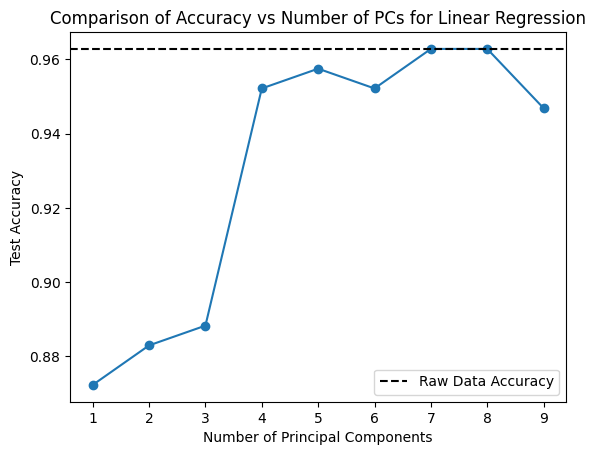

使用PCA降维后的数据在某些主成分数量下，可能会得到与原始数据相当或稍差的准确率。这是因为PCA尝试保留数据中的主要变化方向，但可能丢失了与分类任务相关的关键信息。在某些情况下，PCA可能有助于减少过拟合，提高模型的泛化能力，但这取决于数据的具体特性。

在构建线性回归模型时，并非主成分数量越多越好。相反，选择合适数量的主成分对于提高模型对原始数据的拟合能力至关重要。过多的主成分可能会导致模型复杂度增加，甚至引入噪音，从而影响模型的预测性能。因此，在模型构建过程中，需要权衡主成分数量与模型准确度之间的关系，选择最优的主成分数量以达到最佳的预测效果。

## **10.2. [5 pts] Understanding PCA**

### **10.2.1 [2 pts] Explained Ratio of PCA**
Given a threshold of explained ratio (0 < ratio < 1), compute the number of required PCs to reach the threshold.

In [70]:
def select_n_principal_components(data, variation):
  ## TODO your code here ##
  # 初始化PCA对象  
  pca = PCA()  
    
  # 拟合PCA到数据并转换数据以获取主成分  
  pca.fit(data)  
    
  # 累加解释的方差比例，直到达到或超过阈值  
  explained_variance_ratio_sum = 0  
  n_components = 0  
  for explained_variance_ratio in pca.explained_variance_ratio_:  
      explained_variance_ratio_sum += explained_variance_ratio  
      n_components += 1  
      # 如果累加的比例达到了阈值或超过，就停止循环  
      if explained_variance_ratio_sum >= variation:  
          break  
    
  # 返回所需的主成分数量  
  return n_components  
  ## TODO end ##

### **10.2.2 [3 pts] Composition of PCA**
In this section, we ask you to understand which features specifically in the dataset contribute to the important PCs. We ask that you select the best number of principle components you got from previous part and analyze its composition (as there are multiple components contributing to each PC, you only need to specify the **top three** features that are explained by these PCs together).

In [71]:
## TODO your code here ##
# 假设 n_components 是你从前面的部分得到的最佳主成分数量  
n_components = select_n_principal_components(X, 0.999) 

# 初始化PCA对象并拟合数据  
pca = PCA(n_components=n_components)  
pca.fit(X)  
feature_names = cancer_dataset.feature_names
# 获取主成分加载项  
components = pca.components_  
# 分析每个主成分的组成，并找出每个主成分中贡献最大的前三个特征  
top_features_per_component = []  
for i, component in enumerate(components):  
    # 对每个主成分中的特征按绝对值大小进行排序  
    sorted_indices = np.argsort(np.abs(component))[::-1]  
    # 取出前三个特征的索引  
    top_feature_indices = sorted_indices[:3]  
    # 假设你有一个包含特征名称的列表 feature_names
    # 提取特征名称  
    top_features = [feature_names[index] for index in top_feature_indices]  
    # 将结果添加到列表中  
    top_features_per_component.append(top_features)  
  
# 输出结果  
for i, top_features in enumerate(top_features_per_component):  
    print(f"Top features for Principal Component {i+1}: {top_features}") 
## TODO end ##

Top features for Principal Component 1: ['worst area', 'mean area', 'area error']
Top features for Principal Component 2: ['mean area', 'worst area', 'mean perimeter']
Top features for Principal Component 3: ['area error', 'worst perimeter', 'mean perimeter']


## **10.3. [5 pts] PCA and KMeans**
We first run PCA on the dataset for visualisation in 2D space. Note that k-means is actually being fit on the entire feature set. 

Next, call your k-means class on the dataset X and obtain the clusters. Make sure to populate the "clusters" variable here. We have provided the plotting code for you.

**Add these plots in the written report.**

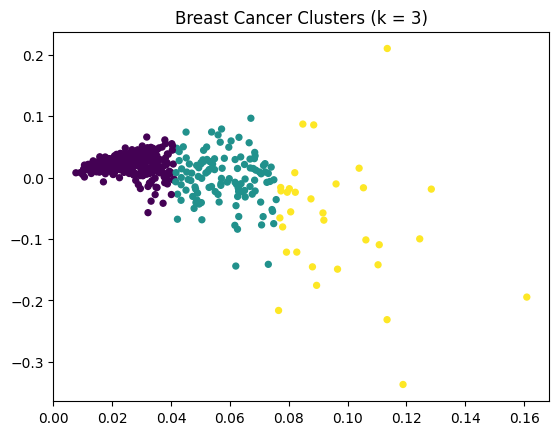

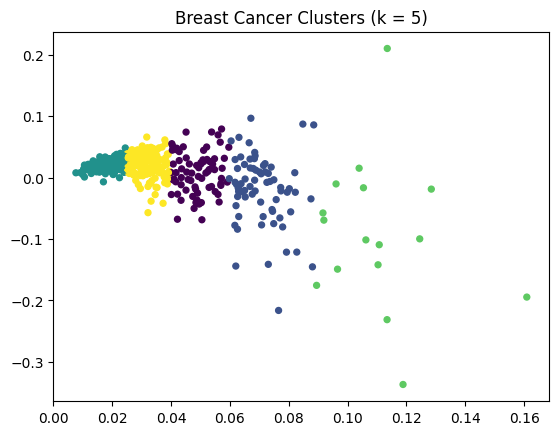

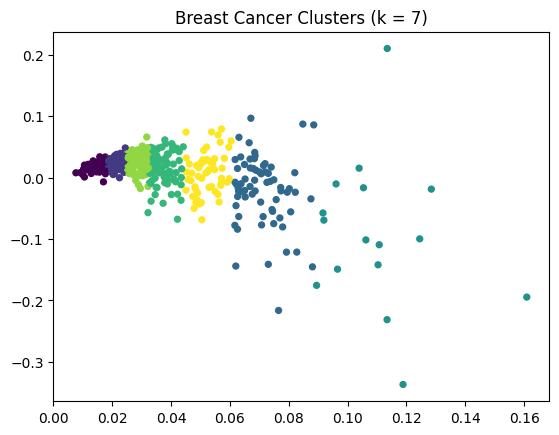

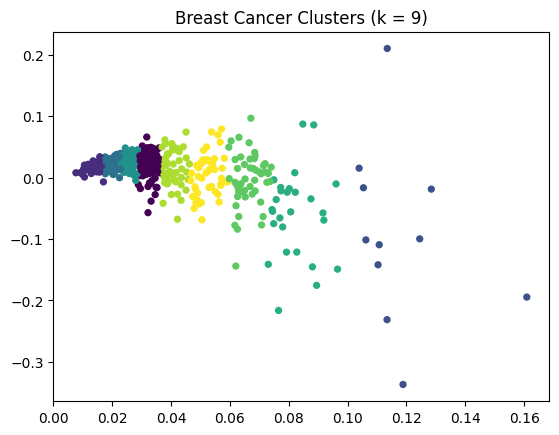

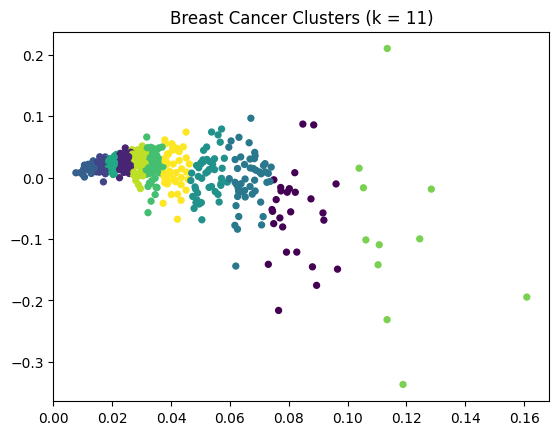

In [72]:
# PCA for visualisation in 2D. 
pca = PCA(n_components = 2)
v = pca.fit(np.transpose(X)).components_

for k in [3,5,7,9, 11]:

    clusters = np.zeros(X.shape[0])
    ## TODO your code here ##
    clusters, centroids, iters_taken = KMeans(n_clusters=k).fit(X)
    ## TODO end ##

    plt.scatter(v[0], v[1], c=clusters, s=18)
    plt.title("Breast Cancer Clusters (k = "+str(k) + ")")
    plt.show()

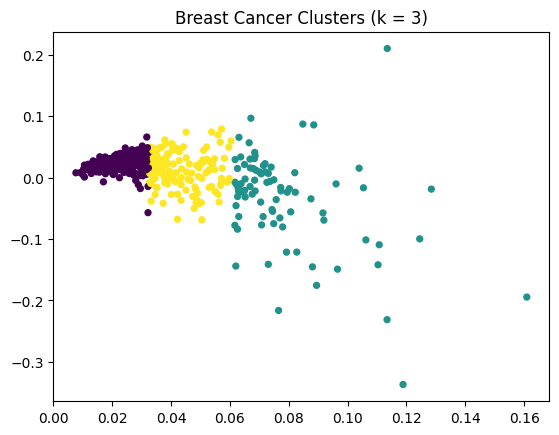
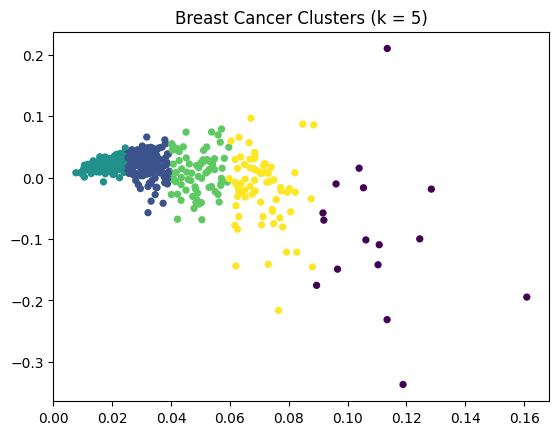
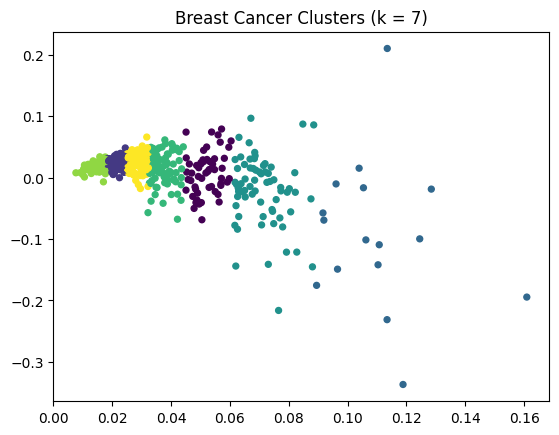
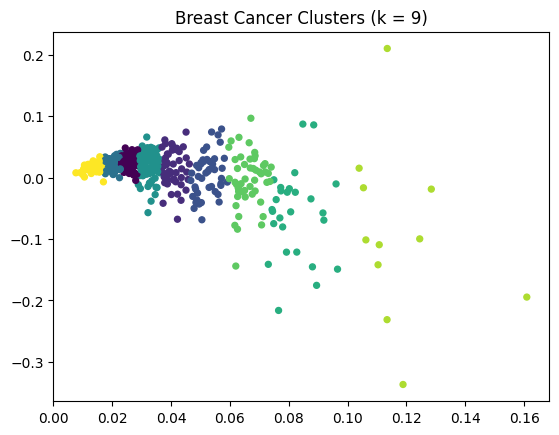
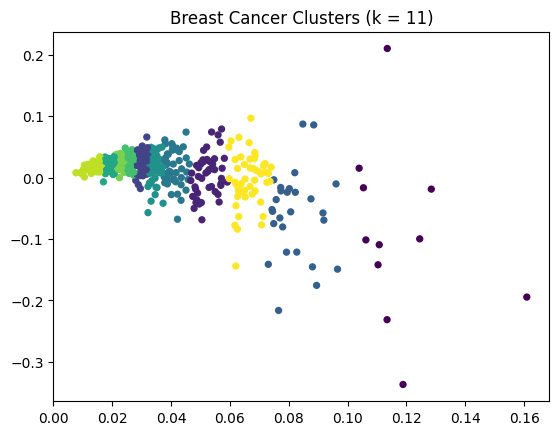

# Submission

- Submit the notebook as a `homework-1111111111-张三.ipynb` file named with your student number and name to the coding portion of the Lexue platform.